## Gluten free

In [92]:
df_glutenFree = df_ingredients[df_ingredients["GlutenFree"] == 1]
df_glutenFree.head()

,id,ingredients,LactoseFree,GlutenFree,Vegan,Vegetarian,IronRich,Omega3Rich,MagnesiumRich,Spicy,Unhealthy,length
1,000033e39b,"[celery, pasta, dill, salt, bell pepper, mayon...",0,1,0,1,0,0,0,0,1,9
2,000035f7ed,"[tomatoes, onion, cucumber, salt, olive oil, b...",1,1,1,1,0,0,0,0,0,7
3,00003a70b1,"[butter, corn, water, french - fried onions, m...",0,1,0,1,1,0,0,0,1,7
5,0000631d90,"[pepper, soy sauce, lemon, garlic, salt, cashe...",1,1,0,0,1,0,0,0,0,11
6,000075604a,"[tea, chicken, pepper]",1,1,0,0,0,0,0,0,0,3


In [93]:
# Getting the lactoseFree ingredients
ingredients_glutenFree = df_common_ing[df_common_ing["GlutenFree"] == 1].index.tolist()
printMain("Ingredients abailable for gluten intolerance people: " + str(len(ingredients_glutenFree)))

Ingredients abailable for gluten intolerance people: 256


In [94]:
# First, we recalculate the dictionary of ingredients
initial_time = time.time()
dic_ingredients_glutenFree = {}
 
for row in df_glutenFree.itertuples():
    for ing in row[2]:
        if ing in ingredients_glutenFree:
            if ing in dic_ingredients_glutenFree:
                dic_ingredients_glutenFree[ing] += 1
            else:
                dic_ingredients_glutenFree[ing] = 1

print("(Time:", round(time.time() - initial_time, 2), "seconds)")
printMain("Number of different ingredients: " + str(len(dic_ingredients_glutenFree)))

(Time: 6.57 seconds)
Number of different ingredients: 256


In [95]:
len(df_ingredients)

779088

In [96]:
len(df_glutenFree)

545587

In [97]:
initial_time = time.time()
dic_ingredients_glutenFree_per = {}
ingredients_glutenFree_per = []
ingredients_glutenFree_per_general = []
keys_glutenFree = []

for key in ingredients_glutenFree:
    
    ingredients_glutenFree_per_general.append(dic_ingredients_per[key])
    keys_glutenFree.append(key)
    if key in dic_ingredients_glutenFree:
        ingredients_glutenFree_per.append((dic_ingredients_glutenFree[key]/len(df_glutenFree))*100)
        dic_ingredients_glutenFree_per[key] = (dic_ingredients_glutenFree[key]/len(df_glutenFree))*100
    else: 
        ingredients_glutenFree_per.append(0)
        dic_ingredients_glutenFree_per[key] = 0
print("(Time:", round(time.time() - initial_time, 2), "seconds)")

(Time: 0.0 seconds)


In [98]:
dic_more_per_glutenFree = {}
dic_less_per_glutenFree = {}
dic_double_glutenFree = {}
dic_half_glutenFree = {}
mean_change_glutenFree = 0
absolute_change_glutenFree = 0
dic_changes_glutenFree = {}
mean_total = 0
initial_time = time.time()

for key in dic_ingredients_glutenFree_per:
    change = dic_ingredients_glutenFree_per[key] - dic_ingredients_per[key]
    dic_changes_glutenFree[key] = change
    mean_change_glutenFree += change
    absolute_change_glutenFree += abs(change)
    mean_total += dic_ingredients_per[key]
    if dic_ingredients_glutenFree_per[key] - 2 > dic_ingredients_per[key]:
        dic_more_per_glutenFree[key] = [dic_ingredients_per[key], dic_ingredients_glutenFree_per[key]]
    elif dic_ingredients_glutenFree_per[key] + 2 < dic_ingredients_per[key]:
        dic_less_per_glutenFree[key] = [dic_ingredients_per[key], dic_ingredients_glutenFree_per[key]]
        
    if dic_ingredients_glutenFree_per[key] > 2*dic_ingredients_per[key]:
        dic_double_glutenFree[key] = [dic_ingredients_per[key], dic_ingredients_glutenFree_per[key]]
    elif dic_ingredients_glutenFree_per[key]*2 < dic_ingredients_per[key]:
        dic_half_glutenFree[key] = [dic_ingredients_per[key], dic_ingredients_glutenFree_per[key]]

mean_change_glutenFree = mean_change_glutenFree/len(dic_ingredients_glutenFree_per)
absolute_change_glutenFree = absolute_change_glutenFree/len(dic_ingredients_glutenFree_per)
mean_total = mean_total/len(dic_ingredients_glutenFree_per)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")

printMain("Ingredients increasing more than 2%:")
print(dic_more_per_glutenFree)
print()
printMain("Ingredients decreasing more than 2%:")
print(dic_less_per_glutenFree)
print()
printMain("Ingredients multipling by 2 their percentage of appearances:")
print(dic_double_glutenFree)
print()
printMain("Ingredients dividing by 2 their percentage of appearances:")
print(dic_half_glutenFree)

(Time: 0.0 seconds)
Ingredients increasing more than 2%:
{'pepper': [31.675754215184938, 34.91083915122611], 'garlic': [26.720986589448177, 31.369149191604638], 'onion': [25.87653769535662, 29.129909620280543], 'olive oil': [19.051121311071405, 22.155403262907658], 'tomatoes': [11.635142628303862, 13.854435681202082], 'vinegar': [9.335659129649025, 11.659918583104071]}

Ingredients decreasing more than 2%:
{'salt': [52.792239130881235, 46.03702067681231], 'sugar': [34.45451604953484, 25.671066209422143], 'butter': [29.072839011767606, 19.233412819586977], 'egg': [26.97975068284969, 14.206533513445152], 'milk': [14.144871952847431, 8.816192467929037], 'vanilla': [12.97517096913314, 6.927950995899828], 'cinnamon': [8.955085946645308, 5.940757386081414], 'baking soda': [6.496313638510669, 0.6501254612005052]}

Ingredients multipling by 2 their percentage of appearances:
{}

Ingredients dividing by 2 their percentage of appearances:
{'baking soda': [6.496313638510669, 0.6501254612005052], 

In [99]:
printMain("Mean change: " + str(mean_change_glutenFree))
printMain("Mean change in absolute value: " + str(absolute_change_glutenFree))
printMain("Mean total: " + str(mean_total))
printMain("Percentual mean change: " + str(absolute_change_glutenFree*100/mean_total))

Mean change: -0.08742822679937691
Mean change in absolute value: 0.5520097249449218
Mean total: 2.843282385943566
Percentual mean change: 19.41452342806017


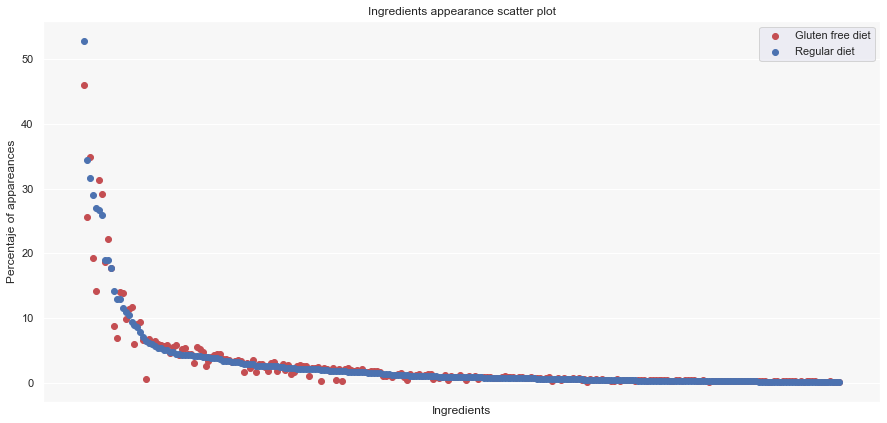

In [100]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(list(range(len(keys_glutenFree))), ingredients_glutenFree_per, color='r', label="Gluten free diet")
ax.scatter(list(range(len(keys_glutenFree))), ingredients_glutenFree_per_general, color='b', label="Regular diet")
ax.set_xlabel('Ingredients')
ax.set_ylabel('Percentaje of appareances')
ax.set_title('Ingredients appearance scatter plot')
ax.set_facecolor((0.97, 0.97, 0.97))
plt.legend(loc="upper right")
plt.xticks([])
plt.show()

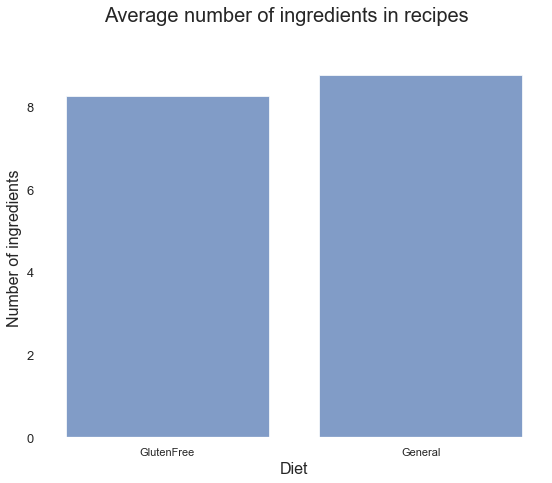

In [101]:
mean_glutenFree = df_ingredients[df_ingredients["GlutenFree"] == 1]["length"].mean()
mean_general = df_ingredients["length"].mean()
_data = [mean_glutenFree, mean_general]
_keys = ["GlutenFree", "General"]
fig, ax = plt.subplots(figsize=(9, 7))
plt.bar(np.arange(2), _data,
       align='center',
       alpha=0.7,
       ecolor='black',
       capsize=10, 
       tick_label=_keys) 
fig.suptitle('Average number of ingredients in recipes', fontsize=20)
plt.ylabel('Number of ingredients', fontsize=16)
plt.xlabel('Diet', fontsize=16)
ax.set_facecolor('xkcd:white')
#ax.set_facecolor((1.0, 0.47, 0.42))
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.show()


(Time: 0.15 seconds)


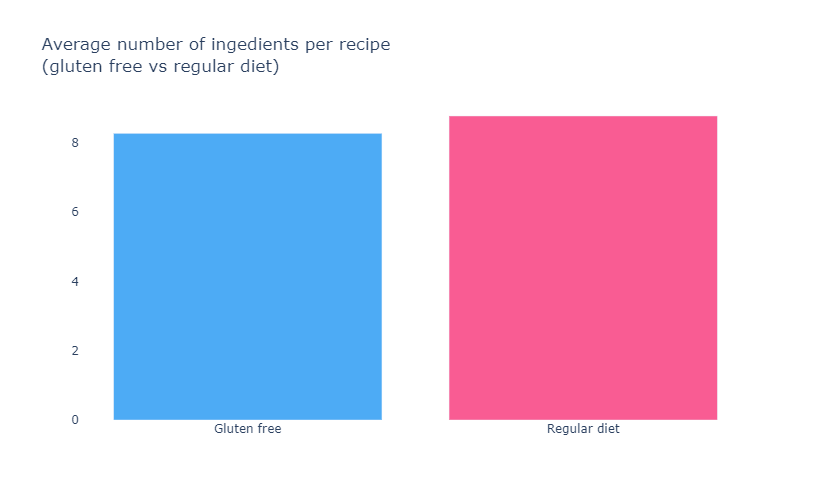

In [102]:
initial_time = time.time()
_keys_diets = ["Gluten free", "Regular diet"]
_hovers = []

_hovers.append("Gluten free diet has " + str(round(mean_glutenFree, 2)) + " ingredients in average per diet.")
_hovers.append("Regular diet has " + str(round(mean_general, 2)) + " ingredients in average per diet.")

_hovers.append("Total number of recipes: " + str(total))
fig = go.Figure(data=[go.Bar(x=_keys_diets,
                             y=_data,
                             hovertext=_hovers,
                             hoverinfo="text",
                             marker_color=["#2196f3", "#f73378"]
                            )])
# Customize aspect
fig.update_traces(opacity=0.8)
fig.update_layout(
    title_text='Average number of ingedients per recipe <br>(gluten free vs regular diet)',
    width=500,
    height=500,
    plot_bgcolor='white'
)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")
fig.show()

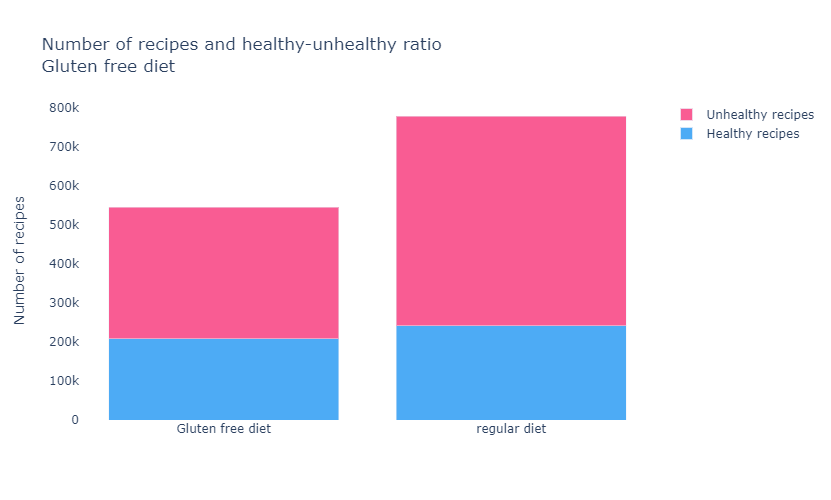

In [104]:
import plotly.graph_objects as go
diets=['Gluten free diet', 'regular diet']
numberOfHealthyGlutenFreeRecipes = len(df_ingredients[(df_ingredients["GlutenFree"] == 1) & (df_ingredients["Unhealthy"] == 0)])
numberOfGlutenFreeRecipes = len(df_ingredients[df_ingredients["GlutenFree"] == 1])

numberOfHealthyRecipes = len(df_ingredients[df_ingredients["Unhealthy"] == 0])
numberOfRecipes = len(df_ingredients)

_hover_healthy1 = "Gluten free:<br><br>"
_hover_healthy1 += "Healthy recipes: " + str(numberOfHealthyGlutenFreeRecipes) + "<br>"
_hover_healthy1 += "Total recipes: " + str(numberOfGlutenFreeRecipes) + "<br>"
_hover_healthy1 += "Percentage of healthy recipes: " + str(round(numberOfHealthyGlutenFreeRecipes*100/numberOfGlutenFreeRecipes, 2)) + "%"

_hover_healthy2 = "No diet:<br><br>"
_hover_healthy2 += "Healthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_healthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_healthy2 += "Percentage of unhealthy recipes: " + str(round(numberOfHealthyRecipes*100/numberOfRecipes, 2)) + "%"

_hover_unhealthy1 = "Gluten free:<br><br>"
_hover_unhealthy1 += "Unhealthy recipes: " + str(numberOfGlutenFreeRecipes - numberOfHealthyGlutenFreeRecipes) + "<br>"
_hover_unhealthy1 += "Total recipes: " + str(numberOfGlutenFreeRecipes) + "<br>"
_hover_unhealthy1 += "Percentage of healthy recipes: " + str(round((numberOfGlutenFreeRecipes - numberOfHealthyGlutenFreeRecipes)*100/numberOfGlutenFreeRecipes, 2)) + "%"

_hover_unhealthy2 = "No diet:<br><br>"
_hover_unhealthy2 += "Unhealthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_unhealthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_unhealthy2 += "Percentage of unhealthy recipes: " + str(round((numberOfRecipes - numberOfHealthyRecipes)*100/numberOfRecipes, 2)) + "%"

fig = go.Figure(data=[
    go.Bar(
        name='Healthy recipes',
        x=diets,
        y=[numberOfHealthyGlutenFreeRecipes, numberOfHealthyRecipes],
        hovertext=[_hover_healthy1, _hover_healthy2],
        hoverinfo="text",
        marker_color= '#2196f3'
    ),
    go.Bar(
        name='Unhealthy recipes',
        x=diets,
        y=[numberOfGlutenFreeRecipes - numberOfHealthyGlutenFreeRecipes, numberOfRecipes - numberOfHealthyRecipes],
        hovertext=[_hover_unhealthy1, _hover_unhealthy2],
        hoverinfo="text",
        marker_color= '#f73378'
    )
])
fig.update_traces(opacity=0.8)
# Change the bar mode
fig.update_layout(
    title_text='Number of recipes and healthy-unhealthy ratio<br>Gluten free diet',
    barmode='stack',
    width=500,
    height=500,
    plot_bgcolor="white",
)
fig.update_yaxes(title_text='Number of recipes')
fig.show()

## Vegan

In [106]:
df_vegan = df_ingredients[df_ingredients["Vegan"] == 1]
df_vegan.head()

,id,ingredients,LactoseFree,GlutenFree,Vegan,Vegetarian,IronRich,Omega3Rich,MagnesiumRich,Spicy,Unhealthy,length
2,000035f7ed,"[tomatoes, onion, cucumber, salt, olive oil, b...",1,1,1,1,0,0,0,0,0,7
12,0000c79afb,"[wine, orange liqueur, water, lemon, brandy, o...",1,1,1,1,0,0,0,0,1,8
14,00010379bf,"[soy sauce, water, vegetable oil, sugar, bakin...",1,0,1,1,1,0,1,0,1,7
31,0001cba765,"[triple sec, orange, tequila, orange wedges, c...",1,1,1,1,0,0,0,0,1,6
36,0002491373,"[pepper, vegetable oil, cilantro, onion, garli...",1,1,1,1,1,0,0,1,1,14


In [107]:
# Getting the lactoseFree ingredients
ingredients_vegan = df_common_ing[df_common_ing["Vegan"] == 1].index.tolist()
printMain("Ingredients abailable for gluten intolerance people: " + str(len(ingredients_vegan)))

Ingredients abailable for gluten intolerance people: 224


In [108]:
# First, we recalculate the dictionary of ingredients
initial_time = time.time()
dic_ingredients_vegan = {}
 
for row in df_vegan.itertuples():
    for ing in row[2]:
        if ing in ingredients_vegan:
            if ing in dic_ingredients_vegan:
                dic_ingredients_vegan[ing] += 1
            else:
                dic_ingredients_vegan[ing] = 1

print("(Time:", round(time.time() - initial_time, 2), "seconds)")
printMain("Number of different ingredients: " + str(len(dic_ingredients_vegan)))

(Time: 1.65 seconds)
Number of different ingredients: 224


In [109]:
len(df_ingredients)

779088

In [110]:
len(df_glutenFree)

545587

In [111]:
dic_ingredients_vegan_per = {}
ingredients_vegan_per = []
ingredients_vegan_per_general = []
keys_vegan = []

for key in ingredients_vegan:
    
    ingredients_vegan_per_general.append(dic_ingredients_per[key])
    keys_vegan.append(key)
    if key in dic_ingredients_vegan:
        ingredients_vegan_per.append((dic_ingredients_vegan[key]/len(df_vegan))*100)
        dic_ingredients_vegan_per[key] = (dic_ingredients_vegan[key]/len(df_vegan))*100
    else: 
        ingredients_vegan_per.append(0)
        dic_ingredients_vegan_per[key] = 0

In [112]:
dic_more_per_vegan = {}
dic_less_per_vegan = {}
dic_double_vegan = {}
dic_half_vegan = {}
mean_change_vegan = 0
absolute_change_vegan = 0
dic_changes_vegan = {}
mean_total = 0
initial_time = time.time()

for key in dic_ingredients_vegan_per:
    change = dic_ingredients_vegan_per[key] - dic_ingredients_per[key]
    dic_changes_vegan[key] = change
    mean_change_vegan += change
    absolute_change_vegan += abs(change)
    mean_total += dic_ingredients_per[key]
    if dic_ingredients_vegan_per[key] - 2 > dic_ingredients_per[key]:
        dic_more_per_vegan[key] = [dic_ingredients_per[key], dic_ingredients_vegan_per[key]]
    elif dic_ingredients_vegan_per[key] + 2 < dic_ingredients_per[key]:
        dic_less_per_vegan[key] = [dic_ingredients_per[key], dic_ingredients_vegan_per[key]]
        
    if dic_ingredients_vegan_per[key] > 2*dic_ingredients_per[key]:
        dic_double_vegan[key] = [dic_ingredients_per[key], dic_ingredients_vegan_per[key]]
    elif dic_ingredients_vegan_per[key]*2 < dic_ingredients_per[key]:
        dic_half_vegan[key] = [dic_ingredients_per[key], dic_ingredients_vegan_per[key]]

mean_change_vegan = mean_change_vegan/len(dic_ingredients_vegan_per)
absolute_change_vegan = absolute_change_vegan/len(dic_ingredients_vegan_per)
mean_total = mean_total/len(dic_ingredients_vegan_per)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")

printMain("Ingredients increasing more than 2%:")
print(dic_more_per_vegan)
print()
printMain("Ingredients decreasing more than 2%:")
print(dic_less_per_vegan)
print()
printMain("Ingredients multipling by 2 their percentage of appearances:")
print(dic_double_vegan)
print()
printMain("Ingredients dividing by 2 their percentage of appearances:")
print(dic_half_vegan)

(Time: 0.0 seconds)
Ingredients increasing more than 2%:
{'water': [19.055870453658635, 27.82002534854246], 'olive oil': [19.051121311071405, 23.757072112683417], 'lemon': [12.936279341999876, 15.21892516953471], 'vinegar': [9.335659129649025, 16.10873740739289], 'ginger': [5.686007228965149, 7.85020840683104], 'cumin': [4.371264863532746, 6.494584035644754], 'lime': [4.225838416199454, 9.062757241974051], 'cilantro': [4.08914012281026, 6.8754654854768535], 'orange': [3.9057205347791264, 6.435132557197548]}

Ingredients decreasing more than 2%:
{'salt': [52.792239130881235, 44.87475990749088], 'sugar': [34.45451604953484, 31.462898357571245], 'pepper': [31.675754215184938, 25.42302013510512], 'onion': [25.87653769535662, 23.340258450603006], 'flour': [23.47064773170682, 7.619588935491879], 'vanilla': [12.97517096913314, 4.792050488024774], 'baking powder': [7.974452179984803, 2.0102439470555185], 'baking soda': [6.496313638510669, 1.942299400258712], 'chocolate': [4.234438214938492, 2.

In [113]:
printMain("Mean change: " + str(mean_change_vegan))
printMain("Mean change in absolute value: " + str(absolute_change_vegan))
printMain("Mean total: " + str(mean_total))
printMain("Percentual mean change: " + str(absolute_change_vegan*100/mean_total))

Mean change: -0.06544073336245676
Mean change in absolute value: 0.8069343207438727
Mean total: 2.664176736132503
Percentual mean change: 30.288317955785192


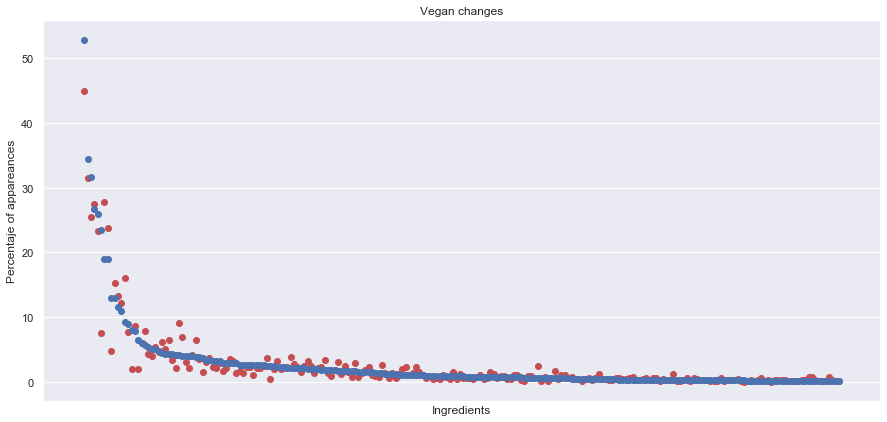

In [114]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(list(range(len(ingredients_vegan_per))), ingredients_vegan_per, color='r')
ax.scatter(list(range(len(ingredients_vegan_per))), ingredients_vegan_per_general, color='b')
ax.set_xlabel('Ingredients')
ax.set_ylabel('Percentaje of appareances')
ax.set_title('Vegan changes')
plt.xticks([])
plt.show()

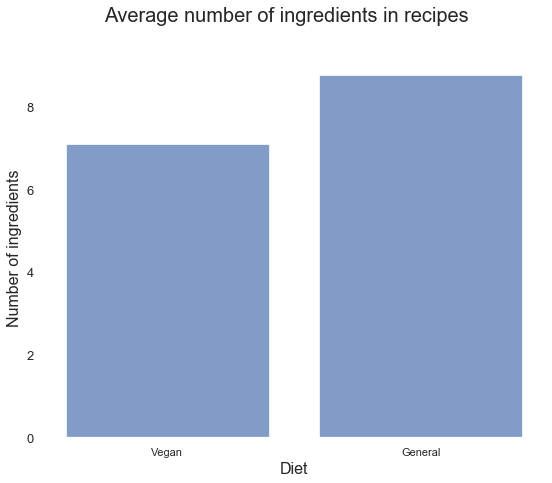

In [115]:
mean_vegan = df_ingredients[df_ingredients["Vegan"] == 1]["length"].mean()
mean_general = df_ingredients["length"].mean()
_data = [mean_vegan, mean_general]
_keys = ["Vegan", "General"]
fig, ax = plt.subplots(figsize=(9, 7))
plt.bar(np.arange(2), _data,
       align='center',
       alpha=0.7,
       ecolor='black',
       capsize=10, 
       tick_label=_keys) 
fig.suptitle('Average number of ingredients in recipes', fontsize=20)
plt.ylabel('Number of ingredients', fontsize=16)
plt.xlabel('Diet', fontsize=16)
ax.set_facecolor('xkcd:white')
#ax.set_facecolor((1.0, 0.47, 0.42))
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.show()


(Time: 0.13 seconds)


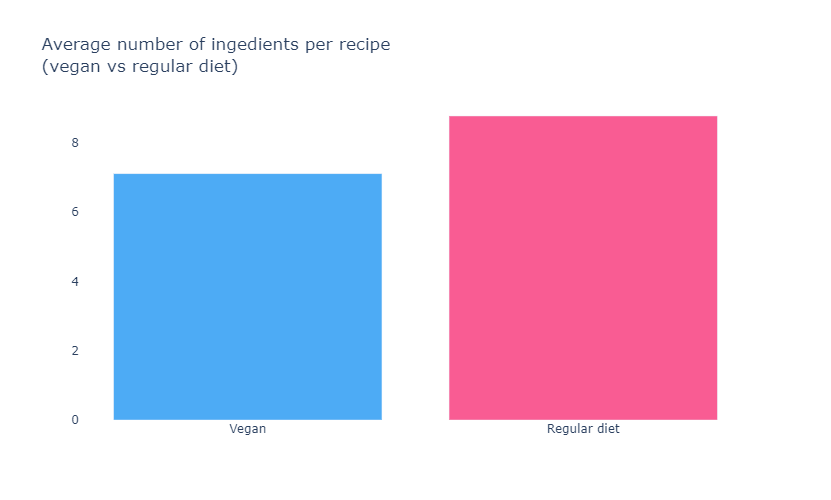

In [116]:
initial_time = time.time()
_keys_diets = ["Vegan", "Regular diet"]
_hovers = []

_hovers.append("Vegan diet has " + str(round(mean_vegan, 2)) + " ingredients in average per diet.")
_hovers.append("Regular diet has " + str(round(mean_general, 2)) + " ingredients in average per diet.")

_hovers.append("Total number of recipes: " + str(total))
fig = go.Figure(data=[go.Bar(x=_keys_diets,
                             y=_data,
                             hovertext=_hovers,
                             hoverinfo="text",
                             marker_color=["#2196f3", "#f73378"]
                            )])
# Customize aspect
fig.update_traces(opacity=0.8)
fig.update_layout(
    title_text='Average number of ingedients per recipe <br>(vegan vs regular diet)',
    width=500,
    height=500,
    plot_bgcolor='white'
)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")
fig.show()

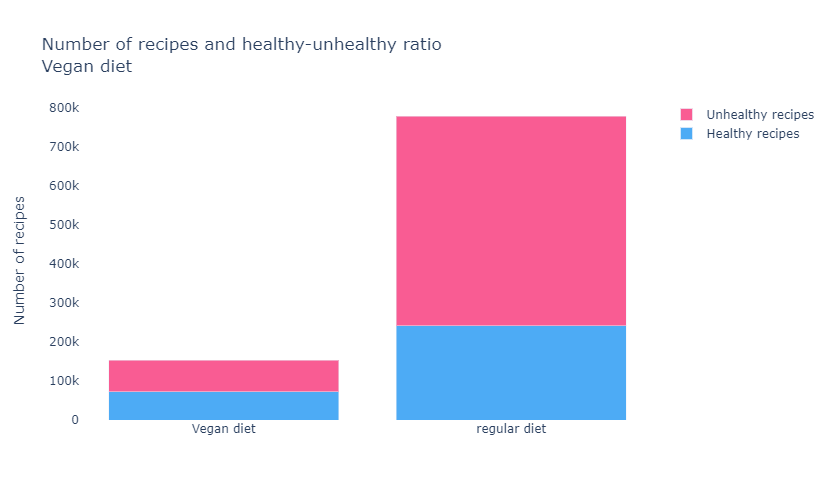

In [118]:
import plotly.graph_objects as go
diets=['Vegan diet', 'regular diet']
numberOfHealthyVeganRecipes = len(df_ingredients[(df_ingredients["Vegan"] == 1) & (df_ingredients["Unhealthy"] == 0)])
numberOfVeganRecipes = len(df_ingredients[df_ingredients["Vegan"] == 1])

numberOfHealthyRecipes = len(df_ingredients[df_ingredients["Unhealthy"] == 0])
numberOfRecipes = len(df_ingredients)

_hover_healthy1 = "Vegan:<br><br>"
_hover_healthy1 += "Healthy recipes: " + str(numberOfHealthyVeganRecipes) + "<br>"
_hover_healthy1 += "Total recipes: " + str(numberOfVeganRecipes) + "<br>"
_hover_healthy1 += "Percentage of healthy recipes: " + str(round(numberOfHealthyVeganRecipes*100/numberOfVeganRecipes, 2)) + "%"

_hover_healthy2 = "No diet:<br><br>"
_hover_healthy2 += "Healthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_healthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_healthy2 += "Percentage of unhealthy recipes: " + str(round(numberOfHealthyRecipes*100/numberOfRecipes, 2)) + "%"

_hover_unhealthy1 = "Vegan:<br><br>"
_hover_unhealthy1 += "Unhealthy recipes: " + str(numberOfVeganRecipes - numberOfHealthyVeganRecipes) + "<br>"
_hover_unhealthy1 += "Total recipes: " + str(numberOfVeganRecipes) + "<br>"
_hover_unhealthy1 += "Percentage of healthy recipes: " + str(round((numberOfVeganRecipes - numberOfHealthyVeganRecipes)*100/numberOfVeganRecipes, 2)) + "%"

_hover_unhealthy2 = "No diet:<br><br>"
_hover_unhealthy2 += "Unhealthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_unhealthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_unhealthy2 += "Percentage of unhealthy recipes: " + str(round((numberOfRecipes - numberOfHealthyRecipes)*100/numberOfRecipes, 2)) + "%"

fig = go.Figure(data=[
    go.Bar(
        name='Healthy recipes',
        x=diets,
        y=[numberOfHealthyVeganRecipes, numberOfHealthyRecipes],
        hovertext=[_hover_healthy1, _hover_healthy2],
        hoverinfo="text",
        marker_color= '#2196f3'
    ),
    go.Bar(
        name='Unhealthy recipes',
        x=diets,
        y=[numberOfVeganRecipes - numberOfHealthyVeganRecipes, numberOfRecipes - numberOfHealthyRecipes],
        hovertext=[_hover_unhealthy1, _hover_unhealthy2],
        hoverinfo="text",
        marker_color= '#f73378'
    )
])
fig.update_traces(opacity=0.8)
# Change the bar mode
fig.update_layout(
    title_text='Number of recipes and healthy-unhealthy ratio<br>Vegan diet',
    barmode='stack',
    width=500,
    height=500,
    plot_bgcolor="white",
)
fig.update_yaxes(title_text='Number of recipes')

fig.show()

## Vegetarian

In [120]:
df_vegetarian = df_ingredients[df_ingredients["Vegetarian"] == 1]
df_vegetarian.head()

,id,ingredients,LactoseFree,GlutenFree,Vegan,Vegetarian,IronRich,Omega3Rich,MagnesiumRich,Spicy,Unhealthy,length
1,000033e39b,"[celery, pasta, dill, salt, bell pepper, mayon...",0,1,0,1,0,0,0,0,1,9
2,000035f7ed,"[tomatoes, onion, cucumber, salt, olive oil, b...",1,1,1,1,0,0,0,0,0,7
3,00003a70b1,"[butter, corn, water, french - fried onions, m...",0,1,0,1,1,0,0,0,1,7
7,00007bfd16,"[butter, water, gelatin, sugar, rhubarb, white...",0,1,0,1,0,0,0,0,1,6
8,000095fc1d,"[yogurt, low - fat granola, strawberries]",0,1,0,1,0,0,0,0,0,3


In [121]:
# Getting the lactoseFree ingredients
ingredients_vegetarian = df_common_ing[df_common_ing["Vegetarian"] == 1].index.tolist()
printMain("Ingredients abailable for gluten intolerance people: " + str(len(ingredients_vegetarian)))

Ingredients abailable for gluten intolerance people: 244


In [122]:
# First, we recalculate the dictionary of ingredients
initial_time = time.time()
dic_ingredients_vegetarian = {}
 
for row in df_vegetarian.itertuples():
    for ing in row[2]:
        if ing in ingredients_vegetarian:
            if ing in dic_ingredients_vegetarian:
                dic_ingredients_vegetarian[ing] += 1
            else:
                dic_ingredients_vegetarian[ing] = 1

print("(Time:", round(time.time() - initial_time, 2), "seconds)")
printMain("Number of different ingredients: " + str(len(dic_ingredients_vegetarian)))

(Time: 5.6 seconds)
Number of different ingredients: 244


In [123]:
len(df_ingredients)

779088

In [124]:
len(df_glutenFree)

545587

In [125]:
dic_ingredients_vegetarian_per = {}
ingredients_vegetarian_per = []
ingredients_vegetarian_per_general = []
keys_vegetarian = []

for key in ingredients_vegetarian:
    
    ingredients_vegetarian_per_general.append(dic_ingredients_per[key])
    keys_vegetarian.append(key)
    if key in dic_ingredients_vegetarian:
        ingredients_vegetarian_per.append((dic_ingredients_vegetarian[key]/len(df_vegetarian))*100)
        dic_ingredients_vegetarian_per[key] = (dic_ingredients_vegetarian[key]/len(df_vegetarian))*100
    else: 
        ingredients_vegetarian_per.append(0)
        dic_ingredients_vegetarian_per[key] = 0

In [126]:
dic_more_per_vegetarian = {}
dic_less_per_vegetarian = {}
dic_double_vegetarian = {}
dic_half_vegetarian = {}
mean_change_vegetarian = 0
absolute_change_vegetarian = 0
dic_changes_vegetarian = {}
mean_total = 0
initial_time = time.time()

for key in dic_ingredients_vegetarian_per:
    change = dic_ingredients_vegetarian_per[key] - dic_ingredients_per[key]
    dic_changes_vegetarian[key] = change
    mean_change_vegetarian += change
    absolute_change_vegetarian += abs(change)
    mean_total += dic_ingredients_per[key]
    if dic_ingredients_vegetarian_per[key] - 2 > dic_ingredients_per[key]:
        dic_more_per_vegetarian[key] = [dic_ingredients_per[key], dic_ingredients_vegetarian_per[key]]
    elif dic_ingredients_vegetarian_per[key] + 2 < dic_ingredients_per[key]:
        dic_less_per_vegetarian[key] = [dic_ingredients_per[key], dic_ingredients_vegetarian_per[key]]
        
    if dic_ingredients_vegetarian_per[key] > 2*dic_ingredients_per[key]:
        dic_double_vegetarian[key] = [dic_ingredients_per[key], dic_ingredients_vegetarian_per[key]]
    elif dic_ingredients_vegetarian_per[key]*2 < dic_ingredients_per[key]:
        dic_half_vegetarian[key] = [dic_ingredients_per[key], dic_ingredients_vegetarian_per[key]]

mean_change_vegetarian = mean_change_vegetarian/len(dic_ingredients_vegetarian_per)
absolute_change_vegetarian = absolute_change_vegetarian/len(dic_ingredients_vegetarian_per)
mean_total = mean_total/len(dic_ingredients_vegetarian_per)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")

printMain("Ingredients increasing more than 2%:")
print(dic_more_per_vegetarian)
print()
printMain("Ingredients decreasing more than 2%:")
print(dic_less_per_vegetarian)
print()
printMain("Ingredients multipling by 2 their percentage of appearances:")
print(dic_double_vegetarian)
print()
printMain("Ingredients dividing by 2 their percentage of appearances:")
print(dic_half_vegetarian)

(Time: 0.0 seconds)
Ingredients increasing more than 2%:
{'sugar': [34.45451604953484, 46.49957899062499], 'butter': [29.072839011767606, 32.72874506975864], 'egg': [26.97975068284969, 33.448086925342345], 'flour': [23.47064773170682, 29.121762357330194], 'milk': [14.144871952847431, 16.908461684118077], 'vanilla': [12.97517096913314, 20.276335244326447], 'cinnamon': [8.955085946645308, 12.613561739312606], 'baking powder': [7.974452179984803, 11.922220028765617], 'baking soda': [6.496313638510669, 9.965634354365001], 'chocolate': [4.234438214938492, 6.610048627590014]}

Ingredients decreasing more than 2%:
{'salt': [52.792239130881235, 49.618674283780464], 'pepper': [31.675754215184938, 20.045485127692746], 'garlic': [26.720986589448177, 16.588373695173097], 'onion': [25.87653769535662, 14.840479749247622], 'olive oil': [19.051121311071405, 14.15236107697824], 'cheese': [17.739074404945267, 12.938887165458699], 'tomatoes': [11.635142628303862, 7.653507269965715], 'bell pepper': [7.893

In [127]:
printMain("Mean change: " + str(mean_change_vegetarian))
printMain("Mean change in absolute value: " + str(absolute_change_vegetarian))
printMain("Mean total: " + str(mean_total))
printMain("Percentual mean change: " + str(absolute_change_vegetarian*100/mean_total))

Mean change: -0.12684509776406724
Mean change in absolute value: 0.8348566558539281
Mean total: 2.945512605238644
Percentual mean change: 28.343340115710976


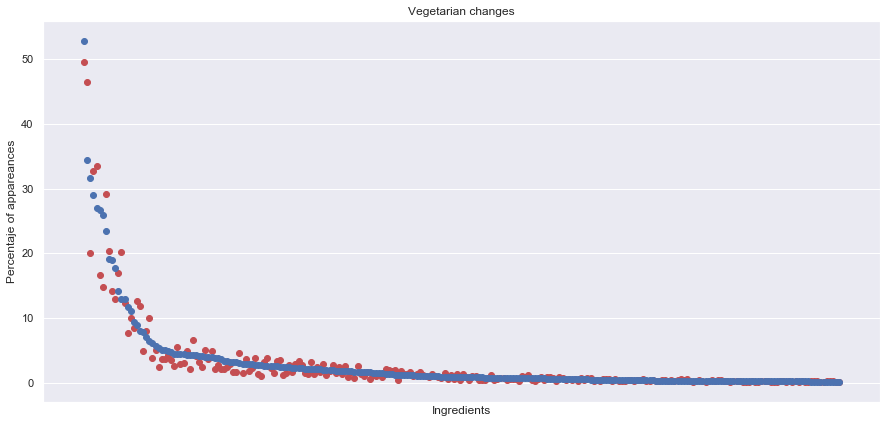

In [128]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(list(range(len(ingredients_vegetarian_per))), ingredients_vegetarian_per, color='r')
ax.scatter(list(range(len(ingredients_vegetarian_per))), ingredients_vegetarian_per_general, color='b')
ax.set_xlabel('Ingredients')
ax.set_ylabel('Percentaje of appareances')
ax.set_title('Vegetarian changes')
plt.xticks([])
plt.show()

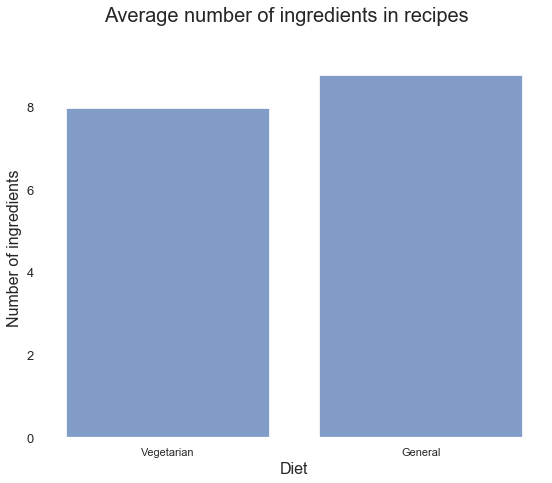

In [129]:
mean_vegetarian = df_ingredients[df_ingredients["Vegetarian"] == 1]["length"].mean()
mean_general = df_ingredients["length"].mean()
_data = [mean_vegetarian, mean_general]
_keys = ["Vegetarian", "General"]
fig, ax = plt.subplots(figsize=(9, 7))
plt.bar(np.arange(2), _data,
       align='center',
       alpha=0.7,
       ecolor='black',
       capsize=10, 
       tick_label=_keys) 
fig.suptitle('Average number of ingredients in recipes', fontsize=20)
plt.ylabel('Number of ingredients', fontsize=16)
plt.xlabel('Diet', fontsize=16)
ax.set_facecolor('xkcd:white')
#ax.set_facecolor((1.0, 0.47, 0.42))
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.show()


(Time: 0.14 seconds)


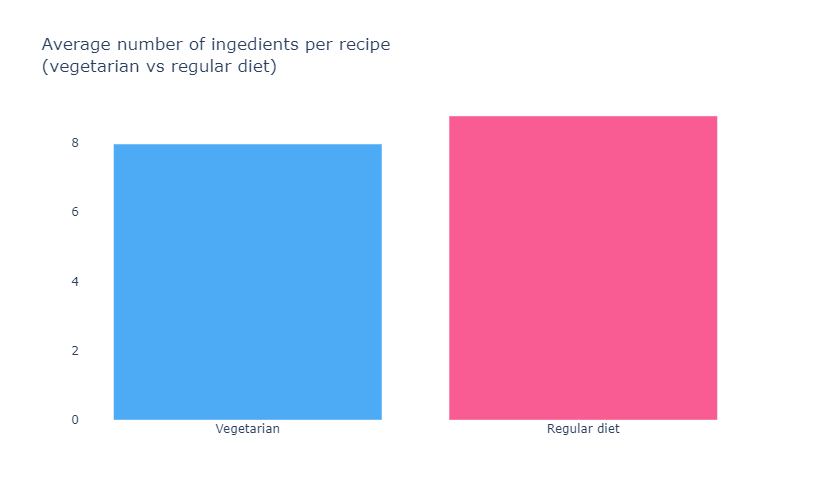

In [130]:
initial_time = time.time()
_keys_diets = ["Vegetarian", "Regular diet"]
_hovers = []

_hovers.append("Vegetarian diet has " + str(round(mean_vegetarian, 2)) + " ingredients in average per diet.")
_hovers.append("Regular diet has " + str(round(mean_general, 2)) + " ingredients in average per diet.")

_hovers.append("Total number of recipes: " + str(total))
fig = go.Figure(data=[go.Bar(x=_keys_diets,
                             y=_data,
                             hovertext=_hovers,
                             hoverinfo="text",
                             marker_color=["#2196f3", "#f73378"]
                            )])
# Customize aspect
fig.update_traces(opacity=0.8)
fig.update_layout(
    title_text='Average number of ingedients per recipe <br>(vegetarian vs regular diet)',
    width=500,
    height=500,
    plot_bgcolor='white'
)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")
fig.show()

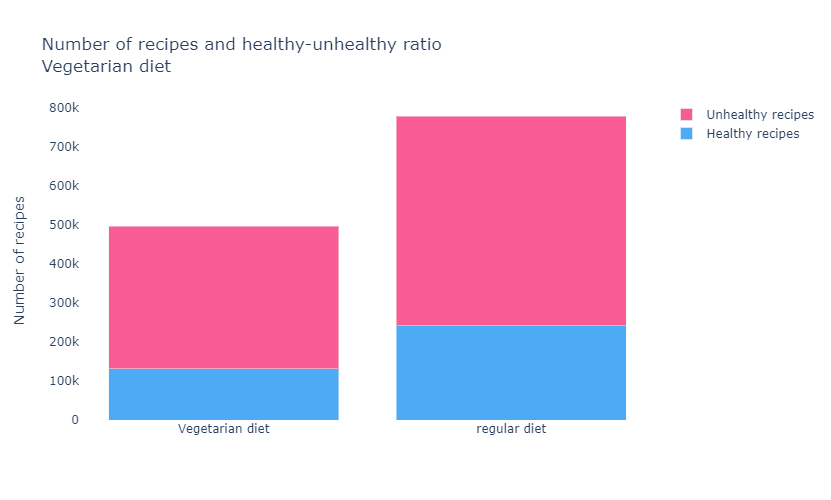

In [132]:
import plotly.graph_objects as go
diets=['Vegetarian diet', 'regular diet']
numberOfHealthyVegetarianRecipes = len(df_ingredients[(df_ingredients["Vegetarian"] == 1) & (df_ingredients["Unhealthy"] == 0)])
numberOfVegetarianRecipes = len(df_ingredients[df_ingredients["Vegetarian"] == 1])

numberOfHealthyRecipes = len(df_ingredients[df_ingredients["Unhealthy"] == 0])
numberOfRecipes = len(df_ingredients)

_hover_healthy1 = "Vegetarian:<br><br>"
_hover_healthy1 += "Healthy recipes: " + str(numberOfHealthyVegetarianRecipes) + "<br>"
_hover_healthy1 += "Total recipes: " + str(numberOfVegetarianRecipes) + "<br>"
_hover_healthy1 += "Percentage of healthy recipes: " + str(round(numberOfHealthyVegetarianRecipes*100/numberOfVegetarianRecipes, 2)) + "%"

_hover_healthy2 = "No diet:<br><br>"
_hover_healthy2 += "Healthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_healthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_healthy2 += "Percentage of unhealthy recipes: " + str(round(numberOfHealthyRecipes*100/numberOfRecipes, 2)) + "%"

_hover_unhealthy1 = "Vegetarian:<br><br>"
_hover_unhealthy1 += "Unhealthy recipes: " + str(numberOfVegetarianRecipes - numberOfHealthyVegetarianRecipes) + "<br>"
_hover_unhealthy1 += "Total recipes: " + str(numberOfVegetarianRecipes) + "<br>"
_hover_unhealthy1 += "Percentage of healthy recipes: " + str(round((numberOfVegetarianRecipes - numberOfHealthyVegetarianRecipes)*100/numberOfVegetarianRecipes, 2)) + "%"

_hover_unhealthy2 = "No diet:<br><br>"
_hover_unhealthy2 += "Unhealthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_unhealthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_unhealthy2 += "Percentage of unhealthy recipes: " + str(round((numberOfRecipes - numberOfHealthyRecipes)*100/numberOfRecipes, 2)) + "%"

fig = go.Figure(data=[
    go.Bar(
        name='Healthy recipes',
        x=diets,
        y=[numberOfHealthyVegetarianRecipes, numberOfHealthyRecipes],
        hovertext=[_hover_healthy1, _hover_healthy2],
        hoverinfo="text",
        marker_color= '#2196f3'
    ),
    go.Bar(
        name='Unhealthy recipes',
        x=diets,
        y=[numberOfVegetarianRecipes - numberOfHealthyVegetarianRecipes, numberOfRecipes - numberOfHealthyRecipes],
        hovertext=[_hover_unhealthy1, _hover_unhealthy2],
        hoverinfo="text",
        marker_color= '#f73378'
    )
])
fig.update_traces(opacity=0.8)
# Change the bar mode
fig.update_layout(
    title_text='Number of recipes and healthy-unhealthy ratio<br>Vegetarian diet',
    barmode='stack',
    width=500,
    height=500,
    plot_bgcolor="white",
)
fig.update_yaxes(title_text='Number of recipes')
fig.show()

## Iron rich

In [134]:
df_ironRich = df_ingredients[df_ingredients["IronRich"] == 1]
df_ironRich.head()

,id,ingredients,LactoseFree,GlutenFree,Vegan,Vegetarian,IronRich,Omega3Rich,MagnesiumRich,Spicy,Unhealthy,length
3,00003a70b1,"[butter, corn, water, french - fried onions, m...",0,1,0,1,1,0,0,0,1,7
5,0000631d90,"[pepper, soy sauce, lemon, garlic, salt, cashe...",1,1,0,0,1,0,0,0,0,11
11,0000b1e2b5,"[butter, chicken broth, fennel seeds, lemon, g...",0,1,0,0,1,0,1,0,1,9
14,00010379bf,"[soy sauce, water, vegetable oil, sugar, bakin...",1,0,1,1,1,0,1,0,1,7
15,000106ec3c,"[medium cheddar, onion, 1 can corn, potatoes, ...",1,1,0,0,1,0,0,0,0,6


In [135]:
# Getting the not iron Rich ingredients
ingredients_not_ironRich = df_common_ing[df_common_ing["IronRich"] == 0].index.tolist()
printMain("Ingredients abailable for gluten intolerance people: " + str(len(ingredients_not_ironRich)))

Ingredients abailable for gluten intolerance people: 230


In [136]:
# Getting the iron rich ingredients
ingredients_ironRich = df_common_ing[df_common_ing["IronRich"] == 1].index.tolist()
printMain("Ingredients abailable for gluten intolerance people: " + str(len(ingredients_ironRich)))

Ingredients abailable for gluten intolerance people: 35


In [137]:
# First, we recalculate the dictionary of ingredients
initial_time = time.time()
dic_ingredients_not_ironRich = {}
 
for row in df_ironRich.itertuples():
    for ing in row[2]:
        if ing not in ingredient_list:
            continue
        if ing not in ingredients_ironRich:
            if ing in dic_ingredients_not_ironRich:
                dic_ingredients_not_ironRich[ing] += 1
            else:
                dic_ingredients_not_ironRich[ing] = 1

print("(Time:", round(time.time() - initial_time, 2), "seconds)")
printMain("Number of different ingredients: " + str(len(dic_ingredients_not_ironRich)))

(Time: 6.58 seconds)
Number of different ingredients: 230


In [138]:
len(df_ingredients)

779088

In [139]:
len(df_glutenFree)

545587

In [140]:
dic_ingredients_ironRich_per = {}
ingredients_ironRich_per = []
ingredients_ironRich_per_general = []
keys_ironRich = []

for key in ingredients_not_ironRich:
    ingredients_ironRich_per_general.append(dic_ingredients_per[key])
    keys_ironRich.append(key)
    if key in dic_ingredients_not_ironRich:
        ingredients_ironRich_per.append((dic_ingredients_not_ironRich[key]/len(df_ironRich))*100)
        dic_ingredients_ironRich_per[key] = (dic_ingredients_not_ironRich[key]/len(df_ironRich))*100
    else: 
        ingredients_ironRich_per.append(0)
        dic_ingredients_ironRich_per[key] = 0

In [141]:
dic_more_per_ironRich = {}
dic_less_per_ironRich = {}
dic_double_ironRich = {}
dic_half_ironRich = {}
mean_change_ironRich = 0
absolute_change_ironRich = 0
dic_changes_ironRich = {}
mean_total = 0
initial_time = time.time()

for key in dic_ingredients_ironRich_per:
    change = dic_ingredients_ironRich_per[key] - dic_ingredients_per[key]
    dic_changes_ironRich[key] = change
    mean_change_ironRich += change
    absolute_change_ironRich += abs(change)
    mean_total += dic_ingredients_per[key]
    if dic_ingredients_ironRich_per[key] - 2 > dic_ingredients_per[key]:
        dic_more_per_ironRich[key] = [dic_ingredients_per[key], dic_ingredients_ironRich_per[key]]
    elif dic_ingredients_ironRich_per[key] + 2 < dic_ingredients_per[key]:
        dic_less_per_ironRich[key] = [dic_ingredients_per[key], dic_ingredients_ironRich_per[key]]
        
    if dic_ingredients_ironRich_per[key] > 2*dic_ingredients_per[key]:
        dic_double_ironRich[key] = [dic_ingredients_per[key], dic_ingredients_ironRich_per[key]]
    elif dic_ingredients_ironRich_per[key]*2 < dic_ingredients_per[key]:
        dic_half_ironRich[key] = [dic_ingredients_per[key], dic_ingredients_ironRich_per[key]]

mean_change_ironRich = mean_change_ironRich/len(dic_ingredients_ironRich_per)
absolute_change_ironRich = absolute_change_ironRich/len(dic_ingredients_ironRich_per)
mean_total = mean_total/len(dic_ingredients_ironRich_per)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")

printMain("Ingredients increasing more than 2%:")
print(dic_more_per_ironRich)
print()
printMain("Ingredients decreasing more than 2%:")
print(dic_less_per_ironRich)
print()
printMain("Ingredients multipling by 2 their percentage of appearances:")
print(dic_double_ironRich)
print()
printMain("Ingredients dividing by 2 their percentage of appearances:")
print(dic_half_ironRich)

(Time: 0.0 seconds)
Ingredients increasing more than 2%:
{'salt': [52.792239130881235, 60.35748031020669], 'pepper': [31.675754215184938, 44.598098791594595], 'garlic': [26.720986589448177, 38.90352982373522], 'onion': [25.87653769535662, 39.37958661244993], 'olive oil': [19.051121311071405, 27.392736285066547], 'cheese': [17.739074404945267, 22.97177771136529], 'tomatoes': [11.635142628303862, 17.15887376495413], 'bell pepper': [7.89384511120695, 11.728445374219277], 'carrot': [6.0914813217505595, 9.94708132209151], 'celery': [5.427628201178814, 8.855501519940349], 'chicken broth': [5.421852216951102, 7.735243597987098], 'oregano': [3.8036781467562073, 6.059535776709141], 'bay leaf': [2.674152342225782, 4.755134138131938]}

Ingredients decreasing more than 2%:
{'sugar': [34.45451604953484, 22.32667095329089], 'butter': [29.072839011767606, 26.304175232368237], 'egg': [26.97975068284969, 21.57288921491383], 'flour': [23.47064773170682, 19.480895844087627], 'milk': [14.144871952847431, 

In [142]:
printMain("Mean change: " + str(mean_change_ironRich))
printMain("Mean change in absolute value: " + str(absolute_change_ironRich))
printMain("Mean total: " + str(mean_total))
printMain("Percentual mean change: " + str(absolute_change_ironRich*100/mean_total))

Mean change: 0.25918557796389147
Mean change in absolute value: 0.9101715882158918
Mean total: 3.07909850447212
Percentual mean change: 29.559677512555947


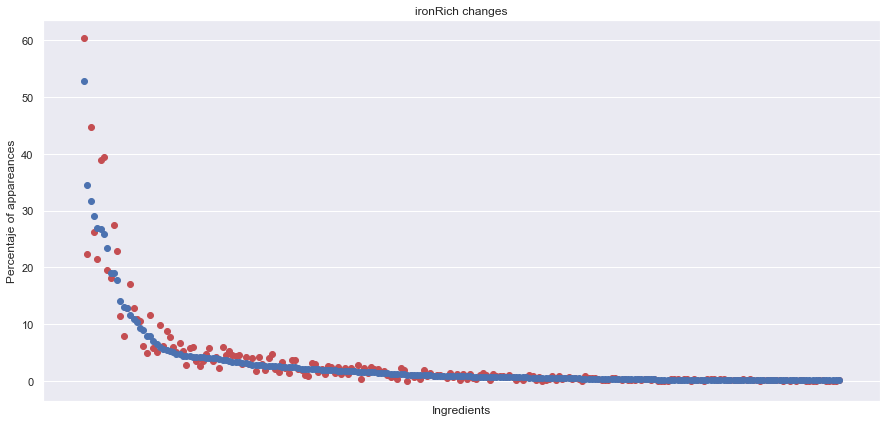

In [143]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(list(range(len(ingredients_ironRich_per))), ingredients_ironRich_per, color='r')
ax.scatter(list(range(len(ingredients_ironRich_per))), ingredients_ironRich_per_general, color='b')
ax.set_xlabel('Ingredients')
ax.set_ylabel('Percentaje of appareances')
ax.set_title('ironRich changes')
plt.xticks([])
plt.show()

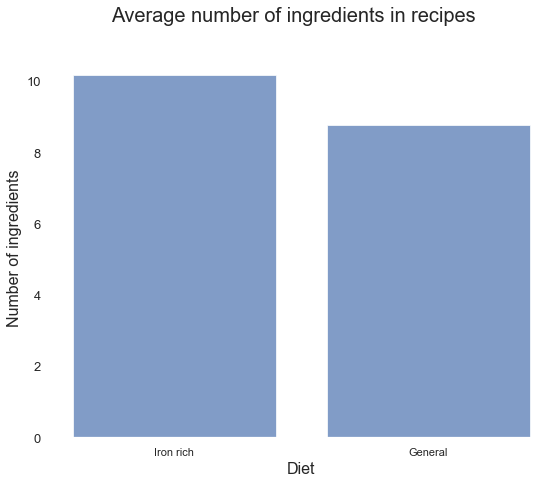

In [144]:
mean_ironRich = df_ingredients[df_ingredients["IronRich"] == 1]["length"].mean()
mean_general = df_ingredients["length"].mean()
_data = [mean_ironRich, mean_general]
_keys = ["Iron rich", "General"]
fig, ax = plt.subplots(figsize=(9, 7))
plt.bar(np.arange(2), _data,
       align='center',
       alpha=0.7,
       ecolor='black',
       capsize=10, 
       tick_label=_keys) 
fig.suptitle('Average number of ingredients in recipes', fontsize=20)
plt.ylabel('Number of ingredients', fontsize=16)
plt.xlabel('Diet', fontsize=16)
ax.set_facecolor('xkcd:white')
#ax.set_facecolor((1.0, 0.47, 0.42))
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.show()


(Time: 0.15 seconds)


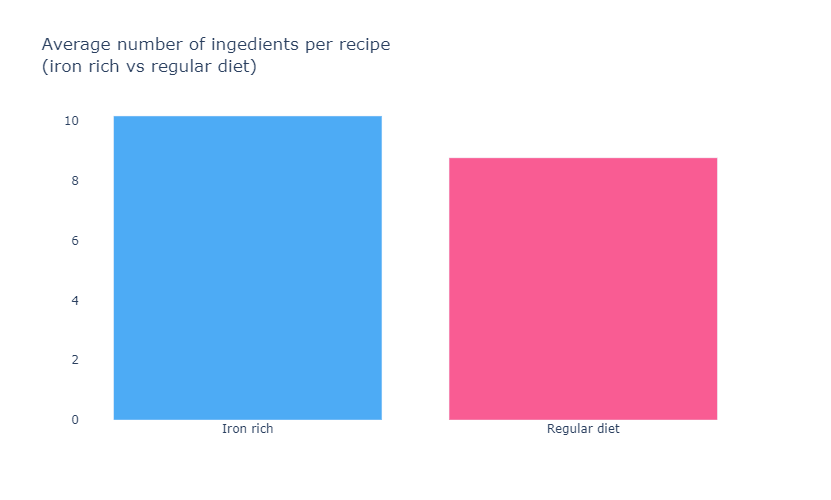

In [145]:
initial_time = time.time()
_keys_diets = ["Iron rich", "Regular diet"]
_hovers = []

_hovers.append("Iron rich diet has " + str(round(mean_ironRich, 2)) + " ingredients in average per diet.")
_hovers.append("Regular diet has " + str(round(mean_general, 2)) + " ingredients in average per diet.")

_hovers.append("Total number of recipes: " + str(total))
fig = go.Figure(data=[go.Bar(x=_keys_diets,
                             y=_data,
                             hovertext=_hovers,
                             hoverinfo="text",
                             marker_color=["#2196f3", "#f73378"]
                            )])
# Customize aspect
fig.update_traces(opacity=0.8)
fig.update_layout(
    title_text='Average number of ingedients per recipe <br>(iron rich vs regular diet)',
    width=500,
    height=500,
    plot_bgcolor='white'
)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")
fig.show()

In [146]:
#ff.plot(fig, filename='plots/IronLength.html')

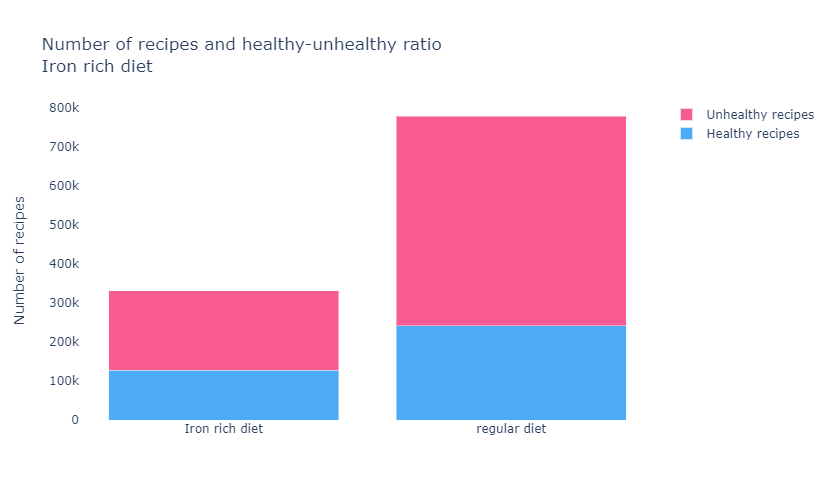

In [147]:
import plotly.graph_objects as go
diets=['Iron rich diet', 'regular diet']
numberOfHealthyIronRichRecipes = len(df_ingredients[(df_ingredients["IronRich"] == 1) & (df_ingredients["Unhealthy"] == 0)])
numberOfIronRichRecipes = len(df_ingredients[df_ingredients["IronRich"] == 1])

numberOfHealthyRecipes = len(df_ingredients[df_ingredients["Unhealthy"] == 0])
numberOfRecipes = len(df_ingredients)

_hover_healthy1 = "Iron rich:<br><br>"
_hover_healthy1 += "Healthy recipes: " + str(numberOfHealthyIronRichRecipes) + "<br>"
_hover_healthy1 += "Total recipes: " + str(numberOfIronRichRecipes) + "<br>"
_hover_healthy1 += "Percentage of healthy recipes: " + str(round(numberOfHealthyIronRichRecipes*100/numberOfIronRichRecipes, 2)) + "%"

_hover_healthy2 = "No diet:<br><br>"
_hover_healthy2 += "Healthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_healthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_healthy2 += "Percentage of unhealthy recipes: " + str(round(numberOfHealthyRecipes*100/numberOfRecipes, 2)) + "%"

_hover_unhealthy1 = "Iron rich:<br><br>"
_hover_unhealthy1 += "Unhealthy recipes: " + str(numberOfIronRichRecipes - numberOfHealthyIronRichRecipes) + "<br>"
_hover_unhealthy1 += "Total recipes: " + str(numberOfIronRichRecipes) + "<br>"
_hover_unhealthy1 += "Percentage of healthy recipes: " + str(round((numberOfIronRichRecipes - numberOfHealthyIronRichRecipes)*100/numberOfIronRichRecipes, 2)) + "%"

_hover_unhealthy2 = "No diet:<br><br>"
_hover_unhealthy2 += "Unhealthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_unhealthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_unhealthy2 += "Percentage of unhealthy recipes: " + str(round((numberOfRecipes - numberOfHealthyRecipes)*100/numberOfRecipes, 2)) + "%"

fig = go.Figure(data=[
    go.Bar(
        name='Healthy recipes',
        x=diets,
        y=[numberOfHealthyIronRichRecipes, numberOfHealthyRecipes],
        hovertext=[_hover_healthy1, _hover_healthy2],
        hoverinfo="text",
        marker_color= '#2196f3'
    ),
    go.Bar(
        name='Unhealthy recipes',
        x=diets,
        y=[numberOfIronRichRecipes - numberOfHealthyIronRichRecipes, numberOfRecipes - numberOfHealthyRecipes],
        hovertext=[_hover_unhealthy1, _hover_unhealthy2],
        hoverinfo="text",
        marker_color= '#f73378'
    )
])
fig.update_traces(opacity=0.8)
# Change the bar mode
fig.update_layout(
    title_text='Number of recipes and healthy-unhealthy ratio<br>Iron rich diet',
    barmode='stack',
    width=500,
    height=500,
    plot_bgcolor="white",
)
fig.update_yaxes(title_text='Number of recipes')
fig.show()

## Omega 3 Rich

In [149]:
df_omega3Rich = df_ingredients[df_ingredients["Omega3Rich"] == 1]
df_omega3Rich.head()

,id,ingredients,LactoseFree,GlutenFree,Vegan,Vegetarian,IronRich,Omega3Rich,MagnesiumRich,Spicy,Unhealthy,length
20,000128a538,"[pecans, oat, soy, blueberries, yogurt, coconut]",0,1,0,1,1,1,1,0,0,6
28,00019675ca,"[pepper, cilantro, onion, garlic, sour cream, ...",0,1,0,0,1,1,0,0,0,11
34,0001d81db6,"[cilantro, tomatoes, garlic, sour cream, lime,...",0,1,0,1,0,1,1,0,1,8
52,00039c5d51,"[pepper, vegetable oil, onion, garlic, stock, ...",1,1,0,0,1,1,1,1,1,10
56,0003dc1278,"[scallion, salt, sushi rice, nori, cucumber, s...",1,1,1,1,1,1,1,0,0,8


In [150]:
# Getting the not omega 3 rich ingredients
ingredients_not_omega3Rich = df_common_ing[df_common_ing["Omega3Rich"] == 0].index.tolist()
printMain("Ingredients abailable for gluten intolerance people: " + str(len(ingredients_not_omega3Rich)))

Ingredients abailable for gluten intolerance people: 255


In [151]:
# Getting the omega3 rich ingredients
ingredients_omega3Rich = df_common_ing[df_common_ing["Omega3Rich"] == 1].index.tolist()
printMain("Ingredients abailable for gluten intolerance people: " + str(len(ingredients_omega3Rich)))

Ingredients abailable for gluten intolerance people: 10


In [152]:
# First, we recalculate the dictionary of ingredients
initial_time = time.time()
dic_ingredients_not_omega3Rich = {}
 
for row in df_omega3Rich.itertuples():
    for ing in row[2]:
        if ing not in ingredient_list:
            continue
        if ing not in ingredients_omega3Rich:
            if ing in dic_ingredients_not_omega3Rich:
                dic_ingredients_not_omega3Rich[ing] += 1
            else:
                dic_ingredients_not_omega3Rich[ing] = 1

print("(Time:", round(time.time() - initial_time, 2), "seconds)")
printMain("Number of different ingredients: " + str(len(dic_ingredients_not_omega3Rich)))

(Time: 1.58 seconds)
Number of different ingredients: 255


In [153]:
len(df_ingredients)

779088

In [154]:
len(df_omega3Rich)

88072

In [155]:
dic_ingredients_omega3Rich_per = {}
ingredients_omega3Rich_per = []
ingredients_omega3Rich_per_general = []
keys_omega3Rich = []

for key in ingredients_not_omega3Rich:
    ingredients_omega3Rich_per_general.append(dic_ingredients_per[key])
    keys_omega3Rich.append(key)
    if key in dic_ingredients_not_omega3Rich:
        ingredients_omega3Rich_per.append((dic_ingredients_not_omega3Rich[key]/len(df_omega3Rich))*100)
        dic_ingredients_omega3Rich_per[key] = (dic_ingredients_not_omega3Rich[key]/len(df_omega3Rich))*100
    else: 
        ingredients_omega3Rich_per.append(0)
        dic_ingredients_omega3Rich_per[key] = 0

In [156]:
dic_more_per_omega3Rich = {}
dic_less_per_omega3Rich = {}
dic_double_omega3Rich = {}
dic_half_omega3Rich = {}
mean_change_omega3Rich = 0
absolute_change_omega3Rich = 0
dic_changes_omega3Rich = {}
mean_total = 0
initial_time = time.time()

for key in dic_ingredients_omega3Rich_per:
    change = dic_ingredients_omega3Rich_per[key] - dic_ingredients_per[key]
    dic_changes_omega3Rich[key] = change
    mean_change_omega3Rich += change
    absolute_change_omega3Rich += abs(change)
    mean_total += dic_ingredients_per[key]
    if dic_ingredients_omega3Rich_per[key] - 2 > dic_ingredients_per[key]:
        dic_more_per_omega3Rich[key] = [dic_ingredients_per[key], dic_ingredients_omega3Rich_per[key]]
    elif dic_ingredients_omega3Rich_per[key] + 2 < dic_ingredients_per[key]:
        dic_less_per_omega3Rich[key] = [dic_ingredients_per[key], dic_ingredients_omega3Rich_per[key]]
        
    if dic_ingredients_omega3Rich_per[key] > 2*dic_ingredients_per[key]:
        dic_double_omega3Rich[key] = [dic_ingredients_per[key], dic_ingredients_omega3Rich_per[key]]
    elif dic_ingredients_omega3Rich_per[key]*2 < dic_ingredients_per[key]:
        dic_half_omega3Rich[key] = [dic_ingredients_per[key], dic_ingredients_omega3Rich_per[key]]

mean_change_omega3Rich = mean_change_omega3Rich/len(dic_ingredients_omega3Rich_per)
absolute_change_omega3Rich = absolute_change_omega3Rich/len(dic_ingredients_omega3Rich_per)
mean_total = mean_total/len(dic_ingredients_omega3Rich_per)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")

printMain("Ingredients increasing more than 2%:")
print(dic_more_per_omega3Rich)
printMain("Ingredients decreasing more than 2%:")
print(dic_less_per_omega3Rich)
print()
printMain("Ingredients multipling by 2 their percentage of appearances:")
print(dic_double_omega3Rich)
print()
printMain("Ingredients dividing by 2 their percentage of appearances:")
print(dic_half_omega3Rich)

(Time: 0.0 seconds)
Ingredients increasing more than 2%:
{'salt': [52.792239130881235, 56.96929784721591], 'pepper': [31.675754215184938, 37.21273503497139], 'garlic': [26.720986589448177, 35.936506494686164], 'onion': [25.87653769535662, 33.24325551821237], 'olive oil': [19.051121311071405, 26.933645199382322], 'lemon': [12.936279341999876, 19.239940049050777], 'tomatoes': [11.635142628303862, 20.76142247252248], 'vegetable oil': [11.030589612469965, 13.735352893087475], 'parsley': [8.566041320107614, 12.26950676719048], 'bell pepper': [7.89384511120695, 13.395857934417297], 'celery': [5.427628201178814, 8.336361159051684], 'chili': [4.38718090896022, 9.416159505858843], 'cumin': [4.371264863532746, 9.222000181669543], 'lime': [4.225838416199454, 10.161004632573349], 'cilantro': [4.08914012281026, 11.446316650013626], 'scallions': [4.061800464132421, 7.887864474520846], 'mayonnaise': [3.797517096913314, 7.858343173766919], 'cayenne': [3.3924280697430844, 5.451221727677355], 'scallion'

In [157]:
printMain("Mean change: " + str(mean_change_omega3Rich))
printMain("Mean change in absolute value: " + str(absolute_change_omega3Rich))
printMain("Mean total: " + str(mean_total))
printMain("Percentual mean change: " + str(absolute_change_omega3Rich*100/mean_total))

Mean change: 0.2714389229908659
Mean change in absolute value: 0.9583703487076664
Mean total: 2.95845408789684
Percentual mean change: 32.3942951363822


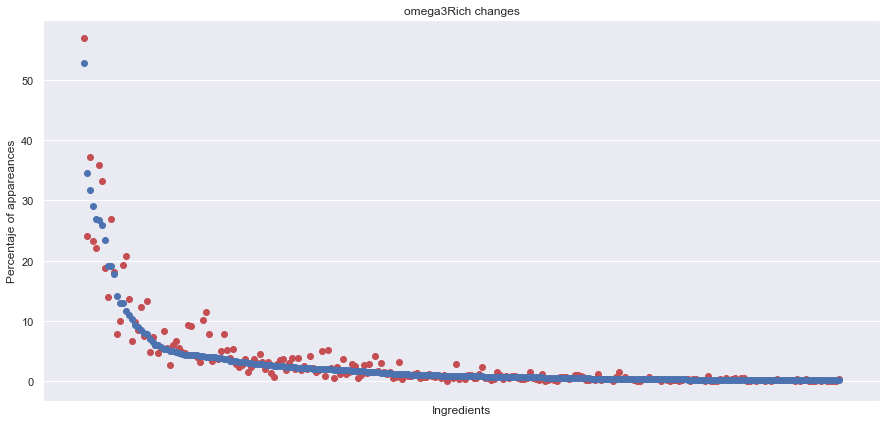

In [158]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(list(range(len(ingredients_omega3Rich_per))), ingredients_omega3Rich_per, color='r')
ax.scatter(list(range(len(ingredients_omega3Rich_per))), ingredients_omega3Rich_per_general, color='b')
ax.set_xlabel('Ingredients')
ax.set_ylabel('Percentaje of appareances')
ax.set_title('omega3Rich changes')
plt.xticks([])
plt.show()

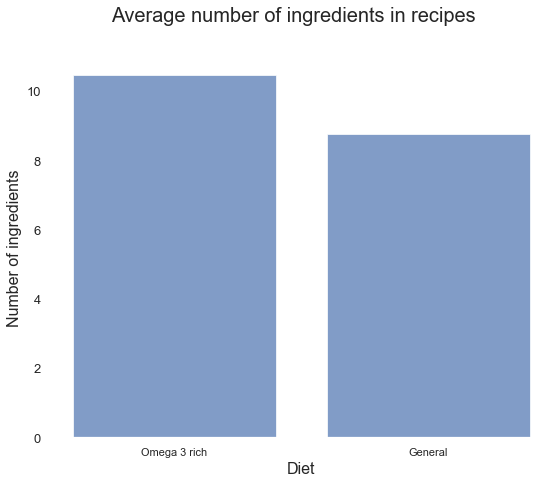

In [159]:
mean_omega3Rich = df_ingredients[df_ingredients["Omega3Rich"] == 1]["length"].mean()
mean_general = df_ingredients["length"].mean()
_data = [mean_omega3Rich, mean_general]
_keys = ["Omega 3 rich", "General"]
fig, ax = plt.subplots(figsize=(9, 7))
plt.bar(np.arange(2), _data,
       align='center',
       alpha=0.7,
       ecolor='black',
       capsize=10, 
       tick_label=_keys) 
fig.suptitle('Average number of ingredients in recipes', fontsize=20)
plt.ylabel('Number of ingredients', fontsize=16)
plt.xlabel('Diet', fontsize=16)
ax.set_facecolor('xkcd:white')
#ax.set_facecolor((1.0, 0.47, 0.42))
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.show()


(Time: 0.13 seconds)


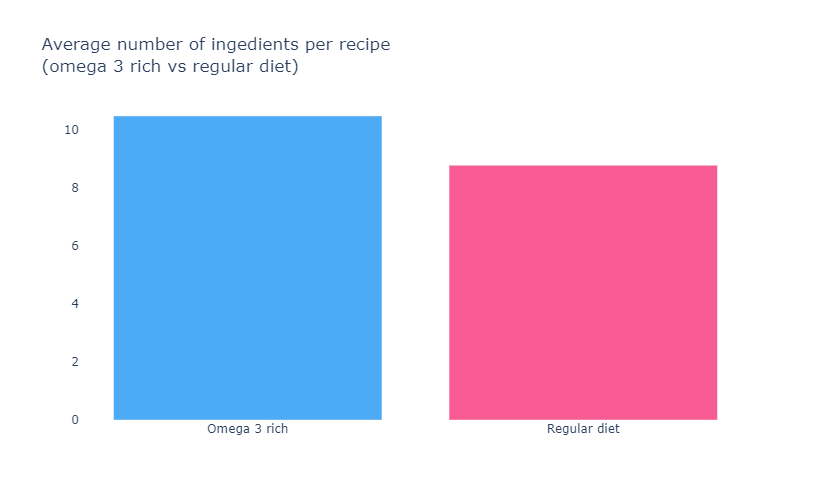

In [160]:
initial_time = time.time()
_keys_diets = ["Omega 3 rich", "Regular diet"]
_hovers = []

_hovers.append("Omega 3 rich diet has " + str(round(mean_omega3Rich, 2)) + " ingredients in average per diet.")
_hovers.append("Regular diet has " + str(round(mean_general, 2)) + " ingredients in average per diet.")

_hovers.append("Total number of recipes: " + str(total))
fig = go.Figure(data=[go.Bar(x=_keys_diets,
                             y=_data,
                             hovertext=_hovers,
                             hoverinfo="text",
                             marker_color=["#2196f3", "#f73378"]
                            )])
# Customize aspect
fig.update_traces(opacity=0.8)
fig.update_layout(
    title_text='Average number of ingedients per recipe <br>(omega 3 rich vs regular diet)',
    width=500,
    height=500,
    plot_bgcolor='white'
)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")
fig.show()

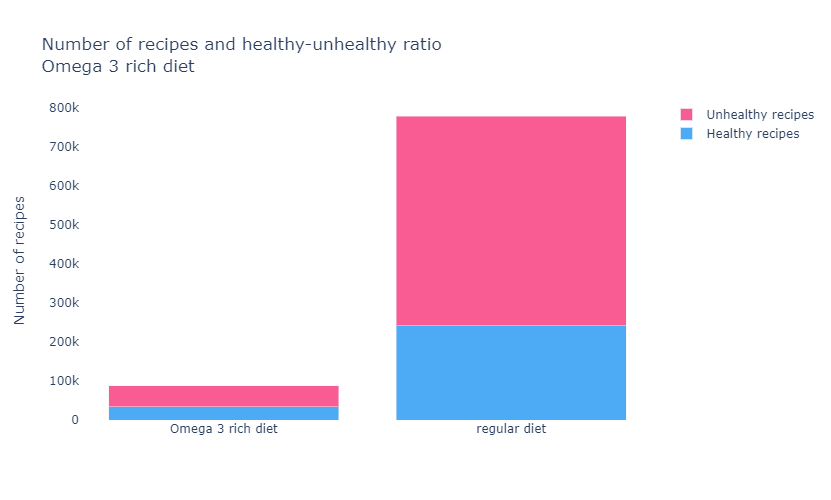

In [162]:
import plotly.graph_objects as go
diets=['Omega 3 rich diet', 'regular diet']
numberOfHealthyOmega3RichRecipes = len(df_ingredients[(df_ingredients["Omega3Rich"] == 1) & (df_ingredients["Unhealthy"] == 0)])
numberOfOmega3RichRecipes = len(df_ingredients[df_ingredients["Omega3Rich"] == 1])

numberOfHealthyRecipes = len(df_ingredients[df_ingredients["Unhealthy"] == 0])
numberOfRecipes = len(df_ingredients)

_hover_healthy1 = "Omega 3 rich:<br><br>"
_hover_healthy1 += "Healthy recipes: " + str(numberOfHealthyOmega3RichRecipes) + "<br>"
_hover_healthy1 += "Total recipes: " + str(numberOfOmega3RichRecipes) + "<br>"
_hover_healthy1 += "Percentage of healthy recipes: " + str(round(numberOfHealthyOmega3RichRecipes*100/numberOfOmega3RichRecipes, 2)) + "%"

_hover_healthy2 = "No diet:<br><br>"
_hover_healthy2 += "Healthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_healthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_healthy2 += "Percentage of unhealthy recipes: " + str(round(numberOfHealthyRecipes*100/numberOfRecipes, 2)) + "%"

_hover_unhealthy1 = "Omega 3 rich:<br><br>"
_hover_unhealthy1 += "Unhealthy recipes: " + str(numberOfOmega3RichRecipes - numberOfHealthyOmega3RichRecipes) + "<br>"
_hover_unhealthy1 += "Total recipes: " + str(numberOfOmega3RichRecipes) + "<br>"
_hover_unhealthy1 += "Percentage of healthy recipes: " + str(round((numberOfOmega3RichRecipes - numberOfHealthyOmega3RichRecipes)*100/numberOfOmega3RichRecipes, 2)) + "%"

_hover_unhealthy2 = "No diet:<br><br>"
_hover_unhealthy2 += "Unhealthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_unhealthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_unhealthy2 += "Percentage of unhealthy recipes: " + str(round((numberOfRecipes - numberOfHealthyRecipes)*100/numberOfRecipes, 2)) + "%"

fig = go.Figure(data=[
    go.Bar(
        name='Healthy recipes',
        x=diets,
        y=[numberOfHealthyOmega3RichRecipes, numberOfHealthyRecipes],
        hovertext=[_hover_healthy1, _hover_healthy2],
        hoverinfo="text",
        marker_color= '#2196f3'
    ),
    go.Bar(
        name='Unhealthy recipes',
        x=diets,
        y=[numberOfOmega3RichRecipes - numberOfHealthyOmega3RichRecipes, numberOfRecipes - numberOfHealthyRecipes],
        hovertext=[_hover_unhealthy1, _hover_unhealthy2],
        hoverinfo="text",
        marker_color= '#f73378'
    )
])
# Change the bar mode
fig.update_traces(opacity=0.8)
# Change the bar mode
fig.update_layout(
    title_text='Number of recipes and healthy-unhealthy ratio<br>Omega 3 rich diet',
    barmode='stack',
    width=500,
    height=500,
    plot_bgcolor="white",
)
fig.update_yaxes(title_text='Number of recipes')
fig.show()

## Magnesium

In [164]:
df_magnesiumRich = df_ingredients[df_ingredients["MagnesiumRich"] == 1]
df_magnesiumRich.head()

,id,ingredients,LactoseFree,GlutenFree,Vegan,Vegetarian,IronRich,Omega3Rich,MagnesiumRich,Spicy,Unhealthy,length
11,0000b1e2b5,"[butter, chicken broth, fennel seeds, lemon, g...",0,1,0,0,1,0,1,0,1,9
14,00010379bf,"[soy sauce, water, vegetable oil, sugar, bakin...",1,0,1,1,1,0,1,0,1,7
16,00010c7867,"[pepper, chili, butter, tomatoes, onion, milk,...",0,0,0,0,1,0,1,1,1,14
17,00010d44c7,"[pepper, butter, onion, garlic, broccoli, milk...",0,1,0,1,1,0,1,0,1,12
20,000128a538,"[pecans, oat, soy, blueberries, yogurt, coconut]",0,1,0,1,1,1,1,0,0,6


In [165]:
# Getting the not omega 3 rich ingredients
ingredients_not_magnesiumRich = df_common_ing[df_common_ing["MagnesiumRich"] == 0].index.tolist()
printMain("Ingredients not rich in magnesium: " + str(len(ingredients_not_magnesiumRich)))

Ingredients not rich in magnesium: 240


In [166]:
# Getting the omega3 rich ingredients
ingredients_magnesiumRich = df_common_ing[df_common_ing["MagnesiumRich"] == 1].index.tolist()
printMain("Ingredients rich in magnesium: " + str(len(ingredients_magnesiumRich)))

Ingredients rich in magnesium: 25


In [167]:
# First, we recalculate the dictionary of ingredients
initial_time = time.time()
dic_ingredients_not_magnesiumRich = {}
 
for row in df_magnesiumRich.itertuples():
    for ing in row[2]:
        if ing not in ingredient_list:
            continue
        if ing not in ingredients_magnesiumRich:
            if ing in dic_ingredients_not_magnesiumRich:
                dic_ingredients_not_magnesiumRich[ing] += 1
            else:
                dic_ingredients_not_magnesiumRich[ing] = 1

print("(Time:", round(time.time() - initial_time, 2), "seconds)")
printMain("Number of different ingredients: " + str(len(dic_ingredients_not_magnesiumRich)))

(Time: 3.49 seconds)
Number of different ingredients: 240


In [168]:
len(df_ingredients)

779088

In [169]:
len(df_magnesiumRich)

195876

In [170]:
dic_ingredients_magnesiumRich_per = {}
ingredients_magnesiumRich_per = []
ingredients_magnesiumRich_per_general = []
keys_magnesiumRich = []

for key in ingredients_not_magnesiumRich:
    ingredients_magnesiumRich_per_general.append(dic_ingredients_per[key])
    keys_magnesiumRich.append(key)
    if key in dic_ingredients_not_magnesiumRich:
        ingredients_magnesiumRich_per.append((dic_ingredients_not_magnesiumRich[key]/len(df_magnesiumRich))*100)
        dic_ingredients_magnesiumRich_per[key] = (dic_ingredients_not_magnesiumRich[key]/len(df_magnesiumRich))*100
    else: 
        ingredients_magnesiumRich_per.append(0)
        dic_ingredients_magnesiumRich_per[key] = 0

In [171]:
dic_more_per_magnesiumRich = {}
dic_less_per_magnesiumRich = {}
dic_double_magnesiumRich = {}
dic_half_magnesiumRich = {}
mean_change_magnesiumRich = 0
absolute_change_magnesiumRich = 0
dic_changes_magnesiumRich = {}
mean_total = 0
initial_time = time.time()

for key in dic_ingredients_magnesiumRich_per:
    change = dic_ingredients_magnesiumRich_per[key] - dic_ingredients_per[key]
    dic_changes_magnesiumRich[key] = change
    mean_change_magnesiumRich += change
    absolute_change_magnesiumRich += abs(change)
    mean_total += dic_ingredients_per[key]
    if dic_ingredients_magnesiumRich_per[key] - 2 > dic_ingredients_per[key]:
        dic_more_per_magnesiumRich[key] = [dic_ingredients_per[key], dic_ingredients_magnesiumRich_per[key]]
    elif dic_ingredients_magnesiumRich_per[key] + 2 < dic_ingredients_per[key]:
        dic_less_per_magnesiumRich[key] = [dic_ingredients_per[key], dic_ingredients_magnesiumRich_per[key]]
        
    if dic_ingredients_magnesiumRich_per[key] > 2*dic_ingredients_per[key]:
        dic_double_magnesiumRich[key] = [dic_ingredients_per[key], dic_ingredients_magnesiumRich_per[key]]
    elif dic_ingredients_magnesiumRich_per[key]*2 < dic_ingredients_per[key]:
        dic_half_magnesiumRich[key] = [dic_ingredients_per[key], dic_ingredients_magnesiumRich_per[key]]

mean_change_magnesiumRich = mean_change_magnesiumRich/len(dic_ingredients_magnesiumRich_per)
absolute_change_magnesiumRich = absolute_change_magnesiumRich/len(dic_ingredients_magnesiumRich_per)
mean_total = mean_total/len(dic_ingredients_magnesiumRich_per)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")

printMain("Ingredients increasing more than 2%:")
print(dic_more_per_magnesiumRich)
print()
printMain("Ingredients decreasing more than 2%:")
print(dic_less_per_magnesiumRich)
print()
printMain("Ingredients multipling by 2 their percentage of appearances:")
print(dic_double_magnesiumRich)
print()
printMain("Ingredients dividing by 2 their percentage of appearances:")
print(dic_half_magnesiumRich)

(Time: 0.0 seconds)
Ingredients increasing more than 2%:
{'vanilla': [12.97517096913314, 17.18740427617472], 'vegetable oil': [11.030589612469965, 13.570319998366315], 'baking soda': [6.496313638510669, 9.64283526312565], 'chocolate': [4.234438214938492, 6.305009291592641], 'cilantro': [4.08914012281026, 6.202903877963609]}

Ingredients decreasing more than 2%:
{'pepper': [31.675754215184938, 29.35224325593743], 'parsley': [8.566041320107614, 6.457656884968041]}

Ingredients multipling by 2 their percentage of appearances:
{'wheat germ': [0.2662086952950116, 0.6427535787947477], 'tahini': [0.2640266568089869, 0.6034429945475709]}

Ingredients dividing by 2 their percentage of appearances:
{'barbecue sauce': [0.7504928839874314, 0.35175314995201046], 'vodka': [0.6424178013266794, 0.16438971594273927], 'bourbon': [0.3715883186494979, 0.16643182421531988], 'apple cider': [0.3667108208572074, 0.14805284976209437], 'tequila': [0.3288460353644261, 0.11486859033265943], 'pepperoni': [0.275706

In [172]:
printMain("Mean change: " + str(mean_change_magnesiumRich))
printMain("Mean change in absolute value: " + str(absolute_change_magnesiumRich))
printMain("Mean total: " + str(mean_total))
printMain("Percentual mean change: " + str(absolute_change_magnesiumRich*100/mean_total))

Mean change: 0.05008109838935288
Mean change in absolute value: 0.40464754377549383
Mean total: 3.0727300168059752
Percentual mean change: 13.16899114345603


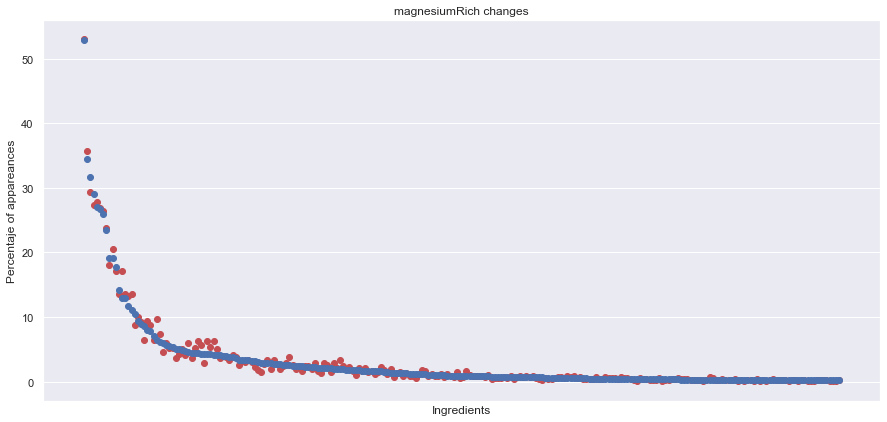

In [173]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(list(range(len(ingredients_magnesiumRich_per))), ingredients_magnesiumRich_per, color='r')
ax.scatter(list(range(len(ingredients_magnesiumRich_per))), ingredients_magnesiumRich_per_general, color='b')
ax.set_xlabel('Ingredients')
ax.set_ylabel('Percentaje of appareances')
ax.set_title('magnesiumRich changes')
plt.xticks([])
plt.show()

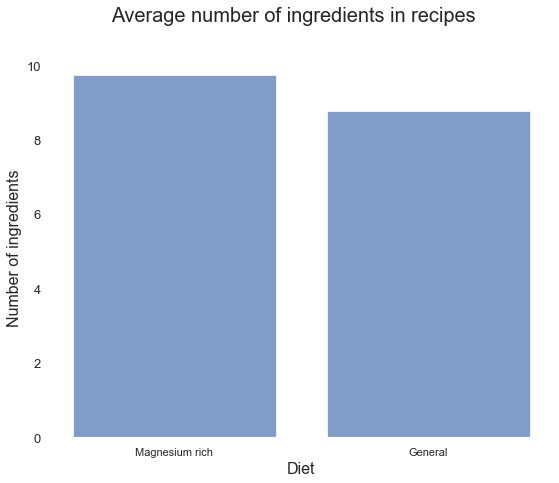

In [174]:
mean_magnesiumRich = df_ingredients[df_ingredients["MagnesiumRich"] == 1]["length"].mean()
mean_general = df_ingredients["length"].mean()
_data = [mean_magnesiumRich, mean_general]
_keys = ["Magnesium rich", "General"]
fig, ax = plt.subplots(figsize=(9, 7))
plt.bar(np.arange(2), _data,
       align='center',
       alpha=0.7,
       ecolor='black',
       capsize=10, 
       tick_label=_keys) 
fig.suptitle('Average number of ingredients in recipes', fontsize=20)
plt.ylabel('Number of ingredients', fontsize=16)
plt.xlabel('Diet', fontsize=16)
ax.set_facecolor('xkcd:white')
#ax.set_facecolor((1.0, 0.47, 0.42))
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.show()


(Time: 0.14 seconds)


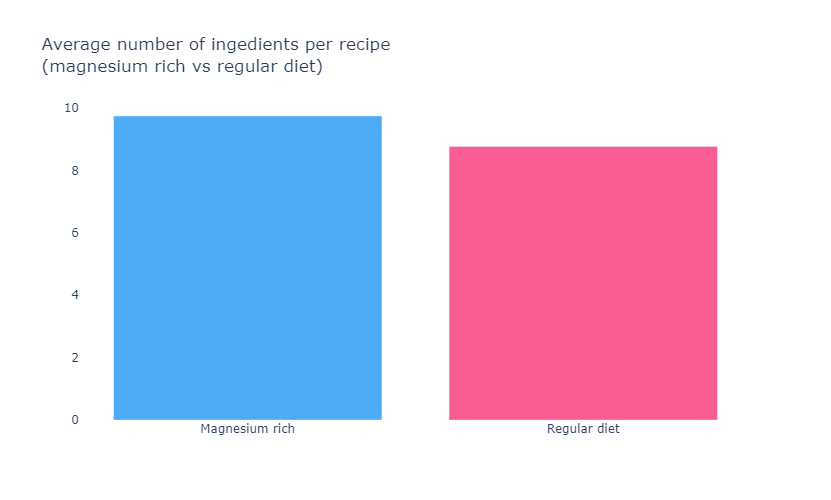

In [175]:
initial_time = time.time()
_keys_diets = ["Magnesium rich", "Regular diet"]
_hovers = []

_hovers.append("Magnesium rich diet has " + str(round(mean_magnesiumRich, 2)) + " ingredients in average per diet.")
_hovers.append("Regular diet has " + str(round(mean_general, 2)) + " ingredients in average per diet.")

_hovers.append("Total number of recipes: " + str(total))
fig = go.Figure(data=[go.Bar(x=_keys_diets,
                             y=_data,
                             hovertext=_hovers,
                             hoverinfo="text",
                             marker_color=["#2196f3", "#f73378"]
                            )])
# Customize aspect
fig.update_traces( opacity=0.8)
fig.update_layout(
    title_text='Average number of ingedients per recipe <br>(magnesium rich vs regular diet)',
    width=500,
    height=500,
    plot_bgcolor='white'
)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")
fig.show()

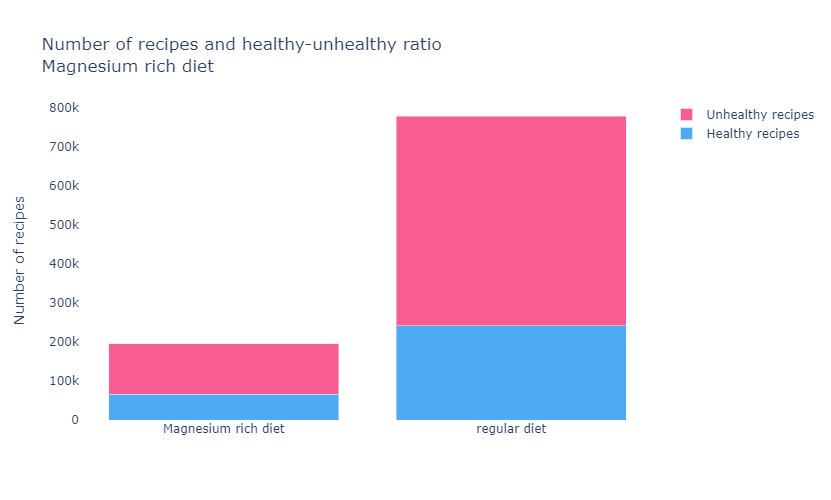

In [177]:
import plotly.graph_objects as go
diets=['Magnesium rich diet', 'regular diet']
numberOfHealthyMagnesiumRichRecipes = len(df_ingredients[(df_ingredients["MagnesiumRich"] == 1) & (df_ingredients["Unhealthy"] == 0)])
numberOfMagnesiumRichRecipes = len(df_ingredients[df_ingredients["MagnesiumRich"] == 1])

numberOfHealthyRecipes = len(df_ingredients[df_ingredients["Unhealthy"] == 0])
numberOfRecipes = len(df_ingredients)

_hover_healthy1 = "Magnesium rich:<br><br>"
_hover_healthy1 += "Healthy recipes: " + str(numberOfHealthyMagnesiumRichRecipes) + "<br>"
_hover_healthy1 += "Total recipes: " + str(numberOfMagnesiumRichRecipes) + "<br>"
_hover_healthy1 += "Percentage of healthy recipes: " + str(round(numberOfHealthyMagnesiumRichRecipes*100/numberOfMagnesiumRichRecipes, 2)) + "%"

_hover_healthy2 = "No diet:<br><br>"
_hover_healthy2 += "Healthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_healthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_healthy2 += "Percentage of unhealthy recipes: " + str(round(numberOfHealthyRecipes*100/numberOfRecipes, 2)) + "%"

_hover_unhealthy1 = "Magnesium rich:<br><br>"
_hover_unhealthy1 += "Unhealthy recipes: " + str(numberOfMagnesiumRichRecipes - numberOfHealthyMagnesiumRichRecipes) + "<br>"
_hover_unhealthy1 += "Total recipes: " + str(numberOfMagnesiumRichRecipes) + "<br>"
_hover_unhealthy1 += "Percentage of healthy recipes: " + str(round((numberOfMagnesiumRichRecipes - numberOfHealthyMagnesiumRichRecipes)*100/numberOfMagnesiumRichRecipes, 2)) + "%"

_hover_unhealthy2 = "No diet:<br><br>"
_hover_unhealthy2 += "Unhealthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_unhealthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_unhealthy2 += "Percentage of unhealthy recipes: " + str(round((numberOfRecipes - numberOfHealthyRecipes)*100/numberOfRecipes, 2)) + "%"

fig = go.Figure(data=[
    go.Bar(
        name='Healthy recipes',
        x=diets,
        y=[numberOfHealthyMagnesiumRichRecipes, numberOfHealthyRecipes],
        hovertext=[_hover_healthy1, _hover_healthy2],
        hoverinfo="text",
        marker_color= '#2196f3'
    ),
    go.Bar(
        name='Unhealthy recipes',
        x=diets,
        y=[numberOfMagnesiumRichRecipes - numberOfHealthyMagnesiumRichRecipes, numberOfRecipes - numberOfHealthyRecipes],
        hovertext=[_hover_unhealthy1, _hover_unhealthy2],
        hoverinfo="text",
        marker_color= '#f73378'
    )
])
fig.update_traces(opacity=0.8)
# Change the bar mode
fig.update_layout(
    title_text='Number of recipes and healthy-unhealthy ratio<br>Magnesium rich diet',
    barmode='stack',
    width=500,
    height=500,
    plot_bgcolor="white",
)
fig.update_yaxes(title_text='Number of recipes')

fig.show()

## Spicy food

In [179]:
df_spicy = df_ingredients[df_ingredients["Spicy"] == 1]
df_spicy.head()

,id,ingredients,LactoseFree,GlutenFree,Vegan,Vegetarian,IronRich,Omega3Rich,MagnesiumRich,Spicy,Unhealthy,length
16,00010c7867,"[pepper, chili, butter, tomatoes, onion, milk,...",0,0,0,0,1,0,1,1,1,14
33,0001d6acb7,"[pepper, butter, coarse sea salt, cilantro, wa...",0,0,0,1,0,0,0,1,1,18
36,0002491373,"[pepper, vegetable oil, cilantro, onion, garli...",1,1,1,1,1,0,0,1,1,14
42,0002e15d76,"[pepper, worcestershire sauce, water, hot dogs...",1,1,0,1,0,0,0,1,1,15
48,00033f624d,"[bacon, butter, cracked pepper, rock salt, egg...",0,0,0,0,0,0,0,1,1,8


In [180]:
# Getting the not omega 3 rich ingredients
ingredients_not_spicy = df_common_ing[df_common_ing["Spicy"] == 0].index.tolist()
printMain("Ingredients not spciy: " + str(len(ingredients_not_spicy)))

Ingredients not spciy: 254


In [181]:
# Getting the omega3 rich ingredients
ingredients_spicy = df_common_ing[df_common_ing["Spicy"] == 1].index.tolist()
printMain("Ingredients spicy: " + str(len(ingredients_spicy)))

Ingredients spicy: 11


In [182]:
# First, we recalculate the dictionary of ingredients
initial_time = time.time()
dic_ingredients_not_spicy = {}
 
for row in df_spicy.itertuples():
    for ing in row[2]:
        if ing not in ingredient_list:
            continue
        if ing not in ingredients_spicy:
            if ing in dic_ingredients_not_spicy:
                dic_ingredients_not_spicy[ing] += 1
            else:
                dic_ingredients_not_spicy[ing] = 1

print("(Time:", round(time.time() - initial_time, 2), "seconds)")
printMain("Number of different ingredients: " + str(len(dic_ingredients_not_spicy)))

(Time: 3.1 seconds)
Number of different ingredients: 254


In [183]:
len(df_ingredients)

779088

In [184]:
len(df_spicy)

171429

In [185]:
dic_ingredients_spicy_per = {}
ingredients_spicy_per = []
ingredients_spicy_per_general = []
keys_spicy = []

for key in ingredients_not_spicy:
    ingredients_spicy_per_general.append(dic_ingredients_per[key])
    keys_spicy.append(key)
    if key in dic_ingredients_not_spicy:
        ingredients_spicy_per.append((dic_ingredients_not_spicy[key]/len(df_spicy))*100)
        dic_ingredients_spicy_per[key] = (dic_ingredients_not_spicy[key]/len(df_spicy))*100
    else: 
        ingredients_spicy_per.append(0)
        dic_ingredients_spicy_per[key] = 0

In [186]:
dic_more_per_spicy = {}
dic_less_per_spicy = {}
dic_double_spicy = {}
dic_half_spicy = {}
mean_change_spicy = 0
absolute_change_spicy = 0
dic_changes_spicy = {}
mean_total = 0
initial_time = time.time()

for key in dic_ingredients_spicy_per:
    change = dic_ingredients_spicy_per[key] - dic_ingredients_per[key]
    dic_changes_spicy[key] = change
    mean_change_spicy += change
    absolute_change_spicy += abs(change)
    mean_total += dic_ingredients_per[key]
    if dic_ingredients_spicy_per[key] - 2 > dic_ingredients_per[key]:
        dic_more_per_spicy[key] = [dic_ingredients_per[key], dic_ingredients_spicy_per[key]]
    elif dic_ingredients_spicy_per[key] + 2 < dic_ingredients_per[key]:
        dic_less_per_spicy[key] = [dic_ingredients_per[key], dic_ingredients_spicy_per[key]]
        
    if dic_ingredients_spicy_per[key] > 2*dic_ingredients_per[key]:
        dic_double_spicy[key] = [dic_ingredients_per[key], dic_ingredients_spicy_per[key]]
    elif dic_ingredients_spicy_per[key]*2 < dic_ingredients_per[key]:
        dic_half_spicy[key] = [dic_ingredients_per[key], dic_ingredients_spicy_per[key]]

mean_change_spicy = mean_change_spicy/len(dic_ingredients_spicy_per)
absolute_change_spicy = absolute_change_spicy/len(dic_ingredients_spicy_per)
mean_total = mean_total/len(dic_ingredients_spicy_per)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")

printMain("Ingredients increasing more than 2%:")
print(dic_more_per_spicy)
print()
printMain("Ingredients decreasing more than 2%:")
print(dic_less_per_spicy)
print()
printMain("Ingredients multipling by 2 their percentage of appearances:")
print(dic_double_spicy)
print()
printMain("Ingredients dividing by 2 their percentage of appearances:")
print(dic_half_spicy)

(Time: 0.0 seconds)
Ingredients increasing more than 2%:
{'salt': [52.792239130881235, 64.08483978790052], 'pepper': [31.675754215184938, 45.7915521877862], 'garlic': [26.720986589448177, 46.32996750841456], 'onion': [25.87653769535662, 43.86189034527413], 'olive oil': [19.051121311071405, 25.946018468287164], 'cheese': [17.739074404945267, 20.042116561375263], 'lemon': [12.936279341999876, 15.332295002595828], 'tomatoes': [11.635142628303862, 19.982033378249888], 'vegetable oil': [11.030589612469965, 15.16137876321976], 'chicken': [10.426164951841127, 16.101709745725636], 'vinegar': [9.335659129649025, 16.724124856354525], 'parsley': [8.566041320107614, 11.653804198822836], 'bell pepper': [7.89384511120695, 14.222797776338892], 'beef': [5.990979196188364, 9.356059943183476], 'ginger': [5.686007228965149, 10.660390015691627], 'celery': [5.427628201178814, 8.548145296303426], 'chicken broth': [5.421852216951102, 7.520314532547003], 'cumin': [4.371264863532746, 13.832548751961454], 'lime

In [187]:
printMain("Mean change: " + str(mean_change_spicy))
printMain("Mean change in absolute value: " + str(absolute_change_spicy))
printMain("Mean total: " + str(mean_total))
printMain("Percentual mean change: " + str(absolute_change_spicy*100/mean_total))

Mean change: 0.42304679295079667
Mean change in absolute value: 1.329057431809012
Mean total: 2.9083753246881354
Percentual mean change: 45.69759000934746


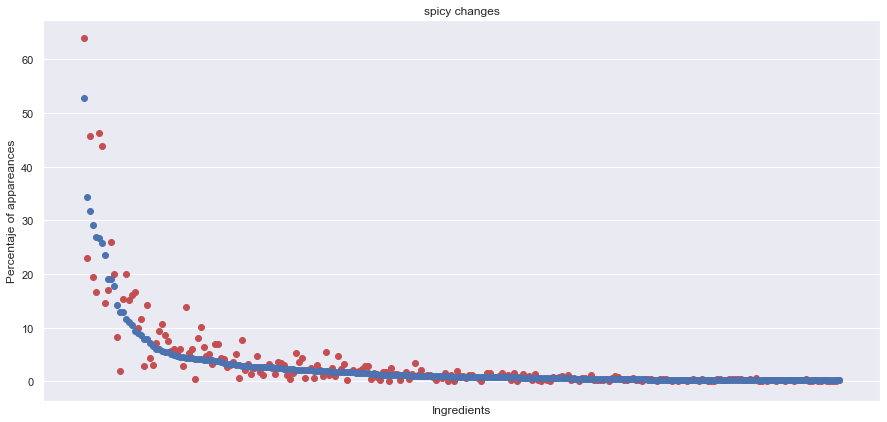

In [188]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(list(range(len(ingredients_spicy_per))), ingredients_spicy_per, color='r')
ax.scatter(list(range(len(ingredients_spicy_per))), ingredients_spicy_per_general, color='b')
ax.set_xlabel('Ingredients')
ax.set_ylabel('Percentaje of appareances')
ax.set_title('spicy changes')
plt.xticks([])
plt.show()

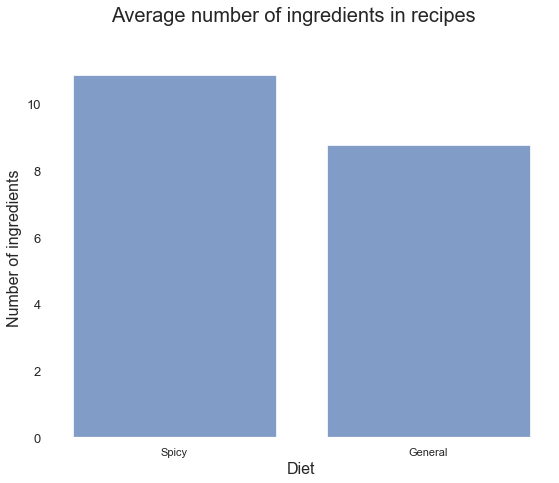

In [189]:
mean_spicy = df_ingredients[df_ingredients["Spicy"] == 1]["length"].mean()
mean_general = df_ingredients["length"].mean()
_data = [mean_spicy, mean_general]
_keys = ["Spicy", "General"]
fig, ax = plt.subplots(figsize=(9, 7))
plt.bar(np.arange(2), _data,
       align='center',
       alpha=0.7,
       ecolor='black',
       capsize=10, 
       tick_label=_keys) 
fig.suptitle('Average number of ingredients in recipes', fontsize=20)
plt.ylabel('Number of ingredients', fontsize=16)
plt.xlabel('Diet', fontsize=16)
ax.set_facecolor('xkcd:white')
#ax.set_facecolor((1.0, 0.47, 0.42))
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.show()


(Time: 0.14 seconds)


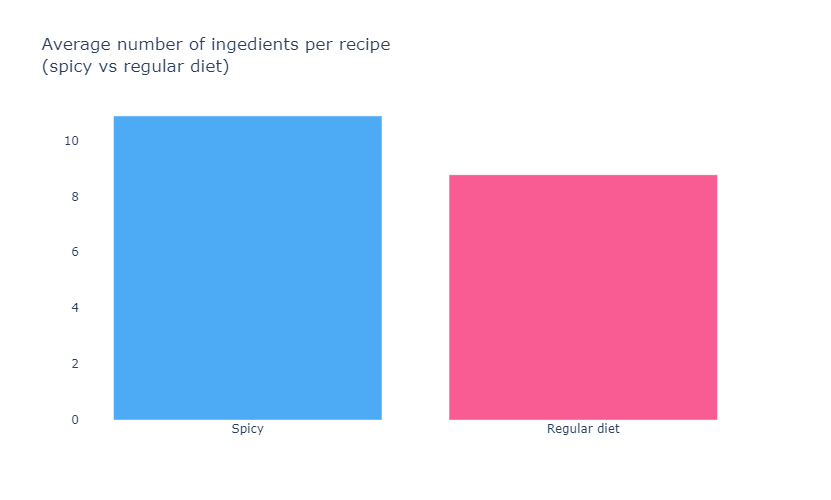

In [190]:
initial_time = time.time()
_keys_diets = ["Spicy", "Regular diet"]
_hovers = []

_hovers.append("Spicy diet has " + str(round(mean_spicy, 2)) + " ingredients in average per diet.")
_hovers.append("Regular diet has " + str(round(mean_general, 2)) + " ingredients in average per diet.")

_hovers.append("Total number of recipes: " + str(total))
fig = go.Figure(data=[go.Bar(x=_keys_diets,
                             y=_data,
                             hovertext=_hovers,
                             hoverinfo="text",
                             marker_color=["#2196f3", "#f73378"]
                            )])
# Customize aspect
fig.update_traces(#marker_color='#2196f3', marker_line_color='#1769aa', marker_line_width=1.3,
                  opacity=0.8)
fig.update_layout(
    title_text='Average number of ingedients per recipe <br>(spicy vs regular diet)',
    width=500,
    height=500,
    plot_bgcolor='white'
)
print("(Time:", round(time.time() - initial_time, 2), "seconds)")
fig.show()

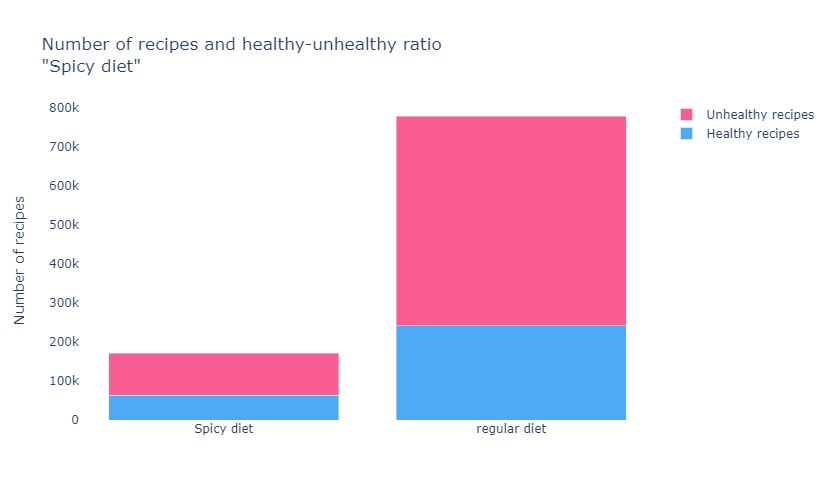

In [192]:
import plotly.graph_objects as go
diets=['Spicy diet', 'regular diet']
numberOfHealthySpicyRecipes = len(df_ingredients[(df_ingredients["Spicy"] == 1) & (df_ingredients["Unhealthy"] == 0)])
numberOfSpicyRecipes = len(df_ingredients[df_ingredients["Spicy"] == 1])

numberOfHealthyRecipes = len(df_ingredients[df_ingredients["Unhealthy"] == 0])
numberOfRecipes = len(df_ingredients)

_hover_healthy1 = "Spicy:<br><br>"
_hover_healthy1 += "Healthy recipes: " + str(numberOfHealthySpicyRecipes) + "<br>"
_hover_healthy1 += "Total recipes: " + str(numberOfSpicyRecipes) + "<br>"
_hover_healthy1 += "Percentage of healthy recipes: " + str(round(numberOfHealthySpicyRecipes*100/numberOfSpicyRecipes, 2)) + "%"

_hover_healthy2 = "No diet:<br><br>"
_hover_healthy2 += "Healthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_healthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_healthy2 += "Percentage of unhealthy recipes: " + str(round(numberOfHealthyRecipes*100/numberOfRecipes, 2)) + "%"

_hover_unhealthy1 = "Spicy:<br><br>"
_hover_unhealthy1 += "Unhealthy recipes: " + str(numberOfSpicyRecipes - numberOfHealthySpicyRecipes) + "<br>"
_hover_unhealthy1 += "Total recipes: " + str(numberOfSpicyRecipes) + "<br>"
_hover_unhealthy1 += "Percentage of healthy recipes: " + str(round((numberOfSpicyRecipes - numberOfHealthySpicyRecipes)*100/numberOfSpicyRecipes, 2)) + "%"

_hover_unhealthy2 = "No diet:<br><br>"
_hover_unhealthy2 += "Unhealthy recipes: " + str(numberOfHealthyRecipes) + "<br>"
_hover_unhealthy2 += "Total recipes: " + str(numberOfRecipes) + "<br>"
_hover_unhealthy2 += "Percentage of unhealthy recipes: " + str(round((numberOfRecipes - numberOfHealthyRecipes)*100/numberOfRecipes, 2)) + "%"

fig = go.Figure(data=[
    go.Bar(
        name='Healthy recipes',
        x=diets,
        y=[numberOfHealthySpicyRecipes, numberOfHealthyRecipes],
        hovertext=[_hover_healthy1, _hover_healthy2],
        hoverinfo="text",
        marker_color= '#2196f3',
    ),
    go.Bar(
        name='Unhealthy recipes',
        x=diets,
        y=[numberOfSpicyRecipes - numberOfHealthySpicyRecipes, numberOfRecipes - numberOfHealthyRecipes],
        hovertext=[_hover_unhealthy1, _hover_unhealthy2],
        hoverinfo="text",
        marker_color= '#f73378',
    )
])

fig.update_traces(opacity=0.8)
# Change the bar mode
fig.update_layout(
    title_text='Number of recipes and healthy-unhealthy ratio<br>"Spicy diet"',
    barmode='stack',
    width=500,
    height=500,
    plot_bgcolor="white",
)
fig.update_yaxes(title_text='Number of recipes')
fig.show()